# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Ankit
##### **Team Member 2 -**Praneeth

# **Project Summary -**

Bike sharing has become a popular mode of transportation in urban areas, and accurate demand prediction models are needed to manage bike sharing fleets efficiently. The Seoul Bike Sharing dataset includes data such as Date, Hour, Temperature, Humidity, and Seasons that can be used to build such models. The dataset has no missing values or duplicates, but some features require further investigation.

The high correlation between Temperature and Dew Point Temperature can lead to multicollinearity issues in models. Features such as Rainfall, Solar Radiation, and Snowfall have 90% of their values as 0 and may not be significant predictors of bike demand. Some features such as Rented Bike Count and Wind Speed are left-skewed and can be transformed using techniques such as square root transformations to improve model accuracy.

Imbalanced features such as Holiday and Functioning Day can negatively impact the model's performance, and techniques such as oversampling or undersampling can address this issue. Highly correlated features such as Temperature and Hour may be important predictors of bike demand and should be included in the model.

Three different models were tested on the preprocessed data: Random Forest Regressor, Decision Tree Regressor, and Gradient Boosting Regressor. The Gradient Boosting Regressor had the best performance with a train and test R2 score of 0.98 and 0.98, respectively, and the train and test RMSE values were 1.2 and 1.2, respectively. Therefore, it is the best model for predicting bike demand in the Seoul Bike Sharing dataset.

It is worth noting that the Gradient Boosting Regressor also performed better than the Random Forest Regressor and the Decision Tree Regressor in terms of train and test RMSE values. However, caution should be exercised in interpreting the results, as the dataset used was limited to a specific location and time period. It may not be generalizable to other locations or time periods.

In conclusion, accurate demand prediction models are necessary to manage bike sharing fleets efficiently. The Seoul Bike Sharing dataset provides useful features for building such models, but some features require further investigation, and imbalanced features can negatively impact model performance. The Gradient Boosting Regressor is the best model for predicting bike demand in this dataset, but caution should be exercised in interpreting the results.

# **GitHub Link -**

https://github.com/PraneethKumar126/ML_Capstone.git

# **Problem Statement**


<b>Business Context</b>

At the moment, rental bikes are being introduced in many metropolitan areas to improve transportation comfort. It is crucial to make the rental bikes approachable and available to the general public at the appropriate moment because it reduces waiting. Eventually, maintaining a steady supply of rental motorcycles for the community emerges as a top priority. Predicting the number of bikes needed to maintain a steady flow of renting bikes is essential.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [80]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from scipy.stats import *
!pip install shap
import shap

### Dataset Loading

In [81]:
# Mounting the drive to colab
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
# Load Dataset
# Data=pd.read_csv('/content/drive/MyDrive/Almabetter/ML Regression/SeoulBikeData.csv',encoding= 'unicode_escape')
Data=pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [83]:
# Dataset First Look
Data.head()


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [84]:
# Dataset Rows & Columns count
Data.shape

(8760, 14)

### Dataset Information

In [85]:

# Dataset Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [86]:
# Dataset Duplicate Value Count
print("The Duplicate value count",Data.duplicated().sum())

The Duplicate value count 0


#### Missing Values/Null Values

In [87]:
# Missing Values/Null Values Count
Data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

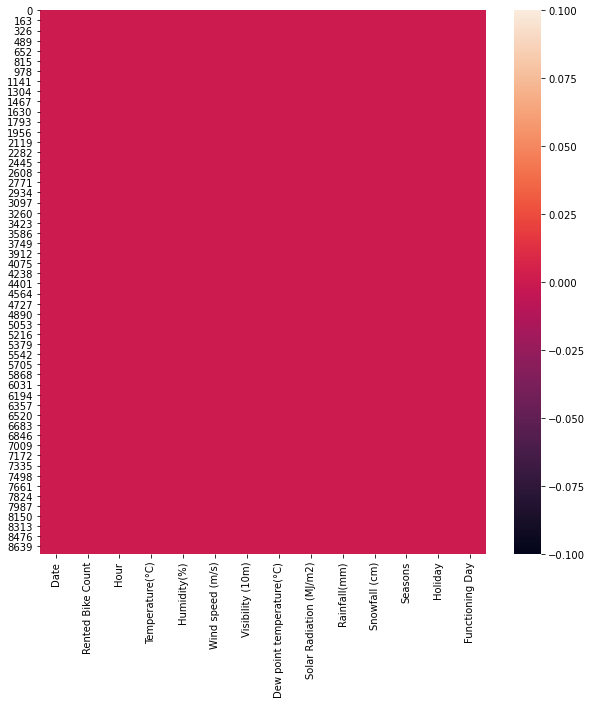

In [88]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.heatmap(Data.isnull())

### What did you know about your dataset?

From the dataset we got to know that


1.   Categorical Features are ['Seasons,'Holiday','FunctioningDay','Hour']
2.   Continoues features are ['Rented Bike Count','Temperature','Humidity','Visibility','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall','Snowfall']

3. We need to change the feature Date type from object to datetime

4. There are no missing values in the Dataset
5. We need to rename the column names Temperature(°C),Humidity(%)
,Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)





## ***2. Understanding Your Variables***

In [89]:
# Dataset Columns
Data.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [90]:
# Dataset Describe
Data.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

### Variables Description 

 
<b> Data Dictionary</b>

<table>
<tr><th>feild</th><th>Description</th></tr>
<tr><td>Date</td><td>Date</td></tr>
<tr><td>Hour</td><td>Hour of the day(0-23)</td></tr>
<tr><td>Temperature(°C)</td><td>Temperature of the day</td></tr>
<tr><td>Humidity(%)</td><td>Humidity measure</td></tr>
<tr><td>Wind speed (m/s)</td><td>Windspeed</td></tr>
<tr><td>Visibility (10m)</td><td>Visibility measure</td></tr>
<tr><td>Dew point temperature(°C)</td><td>Dew Point temperature Meaure</td></tr>
<tr><td>Solar Radiation (MJ/m2)</td><td>Solar Radiation Measure</td></tr>
<tr><td>Rainfall(mm)</td><td>Rainfall in mm</td></tr>
<tr><td>Snowfall (cm)</td><td>Snowfall measure</td></tr>
<tr><td>Seasons</td><td>1=Spring,2=Summer,3=fall,4=winter</td></tr>
<tr><td>Holiday</td><td>Whether a holiday or not</td></tr>
<tr><td>Functioning Day</td><td>Wheather a funtional day or not</td></tr>
</table>



### Check Unique Values for each variable.

In [91]:
# Check Unique Values for each variable.
for i in Data.columns:
  print(i,"=",*Data[i].unique())

Date = 01/12/2017 02/12/2017 03/12/2017 04/12/2017 05/12/2017 06/12/2017 07/12/2017 08/12/2017 09/12/2017 10/12/2017 11/12/2017 12/12/2017 13/12/2017 14/12/2017 15/12/2017 16/12/2017 17/12/2017 18/12/2017 19/12/2017 20/12/2017 21/12/2017 22/12/2017 23/12/2017 24/12/2017 25/12/2017 26/12/2017 27/12/2017 28/12/2017 29/12/2017 30/12/2017 31/12/2017 01/01/2018 02/01/2018 03/01/2018 04/01/2018 05/01/2018 06/01/2018 07/01/2018 08/01/2018 09/01/2018 10/01/2018 11/01/2018 12/01/2018 13/01/2018 14/01/2018 15/01/2018 16/01/2018 17/01/2018 18/01/2018 19/01/2018 20/01/2018 21/01/2018 22/01/2018 23/01/2018 24/01/2018 25/01/2018 26/01/2018 27/01/2018 28/01/2018 29/01/2018 30/01/2018 31/01/2018 01/02/2018 02/02/2018 03/02/2018 04/02/2018 05/02/2018 06/02/2018 07/02/2018 08/02/2018 09/02/2018 10/02/2018 11/02/2018 12/02/2018 13/02/2018 14/02/2018 15/02/2018 16/02/2018 17/02/2018 18/02/2018 19/02/2018 20/02/2018 21/02/2018 22/02/2018 23/02/2018 24/02/2018 25/02/2018 26/02/2018 27/02/2018 28/02/2018 01/

Rented Bike Count = 254 204 173 107 78 100 181 460 930 490 339 360 449 451 447 463 484 555 862 600 426 405 398 323 328 308 262 167 89 79 70 146 219 334 388 479 606 611 589 618 572 489 385 359 377 354 366 342 227 228 117 76 32 13 22 85 152 200 273 333 495 563 621 598 545 443 422 397 350 303 285 186 112 65 41 82 498 937 509 311 379 393 391 338 341 375 515 807 568 353 248 216 198 124 62 42 172 381 812 462 269 321 325 435 529 789 597 418 415 244 145 144 58 87 142 802 440 307 442 416 412 496 239 205 190 165 222 193 218 149 102 83 137 367 754 431 394 390 430 471 552 795 507 402 389 259 233 230 131 99 71 84 158 387 780 395 261 310 355 362 401 500 752 477 384 336 347 275 267 296 237 169 96 56 127 291 351 427 486 569 546 481 298 289 265 326 280 243 9 20 35 31 19 119 182 235 180 214 226 210 148 125 111 67 45 44 86 136 653 212 247 241 253 277 361 557 371 266 174 133 95 54 46 104 580 184 201 225 258 250 305 260 270 256 168 183 120 68 109 591 340 202 251 240 278 392 537 373 263 271 171 170 80 52 10

 1411 1524 1465 1286 1956 1548 1537 1695 1826 1136 1983 1822 1628 1850 1698 1654 1494 903 1728 1903 1022 830 704 1225 1127 1065 2036 1086 681 1708 627 2305 1972 1705 1684 1587 1034 474 1301 1350 1660 876 1384 2286 2127 1943 1109 1271 904 2353 2130 1787 857 1196 1398 1806 1681 1395 1928 2186 2029 1821 1546 2628 1971 1530 788 2830 2364 2169 2057 1828 1990 2528 2087 1808 924 551 1162 1300 886 1261 1516 2080 1357 1560 1762 1841 1887 1685 1582 1686 2836 1931 1303 1845 1892 1110 1523 940 1853 2118 1287 434 1429 3166 2491 2259 2212 1233 748 493 1487 2312 3160 2468 2177 2024 743 2260 896 1577 3154 2365 1179 1792 2255 1978 1675 2201 2033 1930 1463 1057 2147 3298 2518 2240 2090 2369 1527 2171 3222 2455 2072 2018 2391 2129 3256 2443 2012 1824 1309 2021 3146 2003 775 2253 1199 1347 2826 1259 1474 1077 1566 1710 1207 2056 3277 2489 1786 809 1904 1720 1540 1532 1840 2045 1743 1604 439 1366 1492 885 958 750 408 667 1522 1608 1418 2170 1653 1364 1189 1305 2189 2422 2098 2254 2432 2397 1835 1781 856 11

Visibility (10m) = 2000 1928 1996 1936 793 1913 1687 1380 1265 994 990 1256 1221 1167 1202 1178 1276 1436 1487 1309 1406 1666 1780 1955 1953 1945 1891 1697 1585 1448 1446 1352 1296 485 830 1011 1060 914 278 129 244 231 257 321 349 390 422 433 399 358 327 309 253 247 201 194 216 221 207 206 130 371 702 954 1888 1799 1823 1938 1974 1967 1959 1962 1210 331 293 1862 1808 1982 1934 1864 1741 1518 1324 1224 1261 1469 1966 1968 1565 66 180 228 235 233 209 240 227 168 218 119 175 148 173 265 311 628 833 1767 1975 1817 1434 1558 1269 1620 1844 1887 1893 1902 1918 1978 1941 1853 1776 1559 1492 1516 1595 1728 1963 1906 1977 1983 1992 1999 1950 1940 1784 1646 1500 1809 1702 1948 1878 1848 1654 1655 1570 1629 1747 1726 1748 1816 178 91 121 378 305 143 137 245 230 325 715 622 1061 1954 1979 1994 1973 1986 1995 1951 1929 1914 1956 1855 1815 1930 1997 1949 1907 1923 1998 1981 1875 1806 1883 1903 1651 1718 1648 1541 1387 1432 1680 1555 1587 1768 1827 1857 1667 1723 1414 1216 1397 1351 1369 1290 1262 11

Solar Radiation (MJ/m2) = 0.0 0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3 0.8 1.0 1.09 1.12 0.99 0.74 0.22 0.06 0.02 0.25 0.43 0.6 0.69 0.53 0.2 0.05 0.64 1.17 0.88 0.55 0.18 0.21 0.63 0.93 1.08 1.1 0.96 0.72 0.36 0.1 0.14 0.41 0.98 1.14 1.04 0.84 0.51 0.15 1.22 0.87 0.56 0.61 0.89 1.05 1.13 1.06 0.4 0.03 0.28 0.35 0.62 1.26 1.24 0.92 0.58 0.19 1.23 0.13 0.52 0.48 0.09 0.34 0.42 0.32 0.86 1.07 0.17 0.85 0.47 0.57 0.91 0.71 0.12 0.67 0.77 0.78 0.16 0.66 0.38 0.11 0.04 0.07 1.18 0.9 0.33 0.75 0.59 0.29 0.81 0.83 0.39 1.15 1.03 0.95 0.76 1.02 0.26 0.5 0.27 0.73 0.46 0.31 1.2 1.19 0.45 0.49 0.79 0.44 0.68 1.27 1.25 1.21 0.7 1.28 1.3 1.29 0.82 1.65 2.04 2.25 2.18 1.91 1.42 1.57 1.99 2.22 2.17 1.89 1.4 1.73 2.12 2.29 2.23 1.94 1.44 1.72 2.09 2.3 2.24 1.93 1.56 1.97 2.02 1.87 1.41 1.54 1.9 2.11 1.81 1.37 1.66 1.49 1.75 2.35 1.36 1.43 2.08 1.55 2.28 2.19 1.96 1.34 1.68 1.84 1.45 1.7 2.01 2.2 1.33 2.46 2.39 1.63 1.98 1.77 1.38 1.71 2.03 2.21 1.82 2.14 2.49 0.37 1.39 2.36 1.95 2.5 2.52

## 3. ***Data Wrangling***

### Data Wrangling Code

In [92]:
# Write your code to make your dataset analysis ready.
# Convert Date object into datetime

Data['Date']=pd.to_datetime(Data['Date'], infer_datetime_format=True)
# Create Day,Month,Year Feature from the Date
Data['Day']=Data['Date'].dt.day
Data['Month']=Data['Date'].dt.month
Data['Year']=Data['Date'].dt.year
Data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Day  Month  Year  
0             Yes   12      1  2017  
1             Yes   12      1  2017  
2             Yes   12      1  2017  
3             Yes   12      1  2017  
4             Yes   12      1  2017

In [93]:
# Renaming the Feature Names
new_column_names={'Rented Bike Count':'Rented_Bike_Count',
                  'Temperature(°C)':'Temperature',
                  'Humidity(%)':'Humidity',
                  'Wind speed (m/s)':'Wind_speed',
                  'Visibility (10m)':'Visibitlity', 
                  'Dew point temperature(°C)':'Dew_point_temperature',
                  'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                  'Rainfall(mm)':'Rainfall', 
                  'Snowfall (cm)':'Snowfall',
                  'Functioning Day':'Functioning_Day'
}

Data.rename(columns=new_column_names,inplace=True)
Data.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibitlity  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0         2000                  -17.6              0.0       0.0       0.0   
1         2000                  -17.6              0.0       0.0       0.0   
2         2000                  -17.7              0.0       0.0       0.0   
3         2000                  -17.6              0.0       0.0       0.0   
4         2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Day  Month  Year  
0  Winter  No Holiday             Yes   12      1  2017  
1  Winter  No Holiday             Yes   12      1  2017  
2  Winter  No Holiday             Yes   12      1  2017  
3  Winter  No Holiday             Yes   12      1  2017  
4  Winter  No Holiday             Yes   12      1  2017

### What all manipulations have you done and insights you found?

1. Created the features Day, Month and Year from the Date feature 
2. Renamed the features of the table

**Insights**
1. The Features **Rented Bike Count,Rainfall,Snowfall** might have outlier because of the difference between the Quantile 3 and Max is huge.
    *   For Rented Bike Count Q3(75%) value is 1065 and Max is 3556.
    *   For Rainfall and Snowfall the value till Q3 is 0 but the max is 35 and 8.8
2. For Visibility the Max value  and Q3 value is same(2000)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [94]:
# Created the list for catergorical and numerical features 
Categorical=['Hour','Seasons','Holiday','Functioning_Day','Month','Day','Year']
Numerical=['Rented_Bike_Count','Temperature','Humidity','Wind_speed','Visibitlity','Dew_point_temperature','Solar_Radiation',
           'Rainfall','Snowfall']


#### Chart - 1

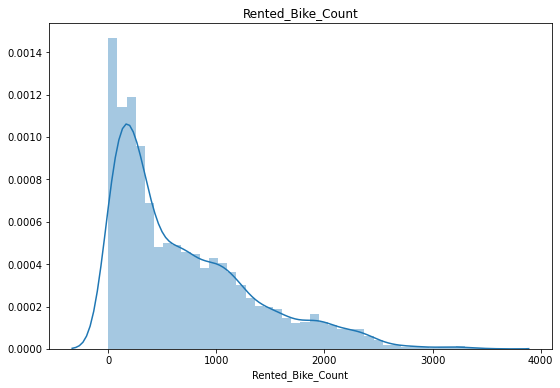

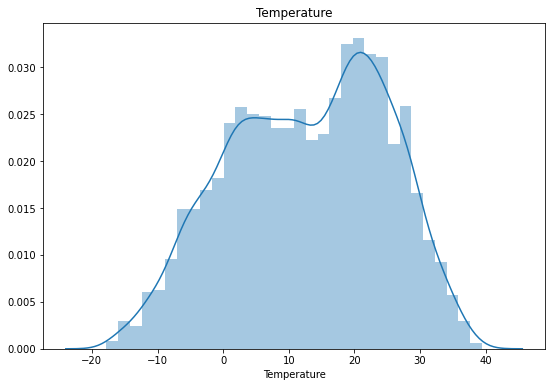

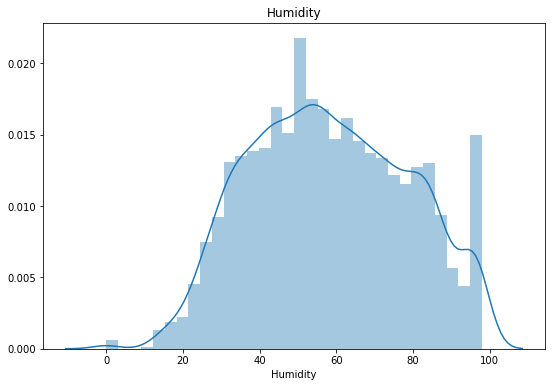

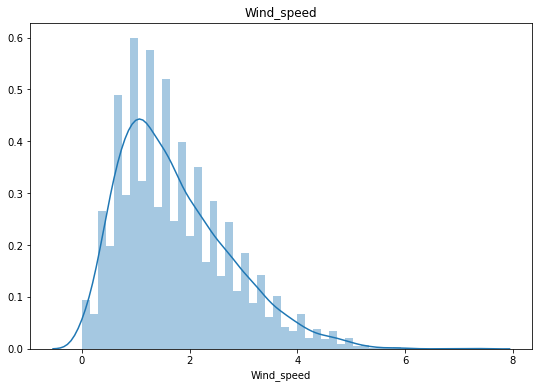

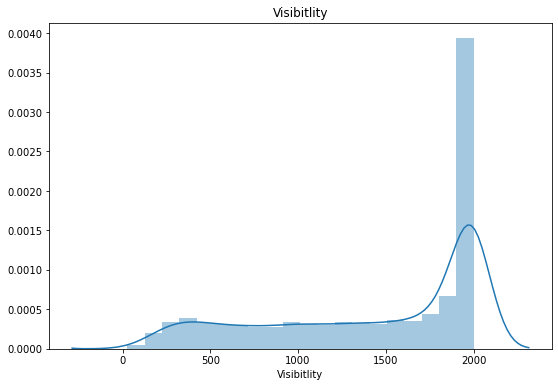

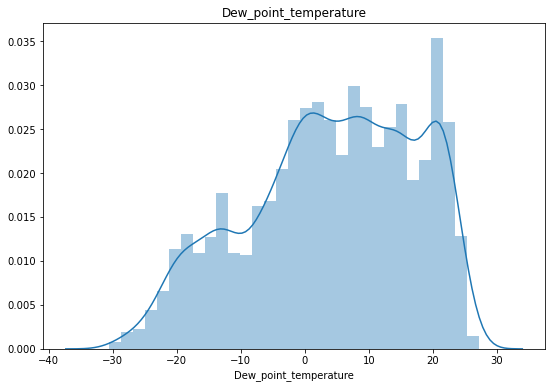

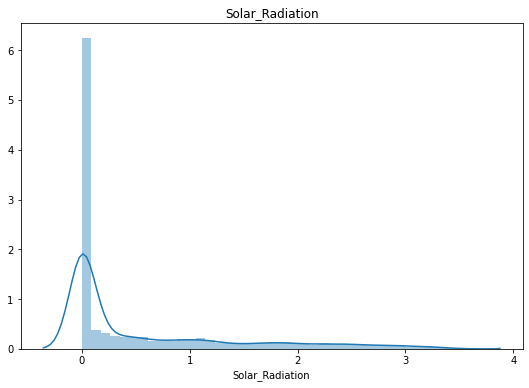

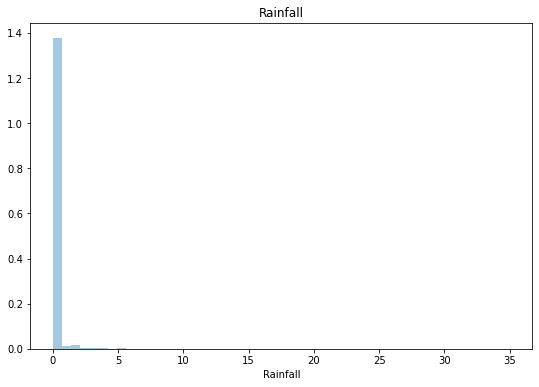

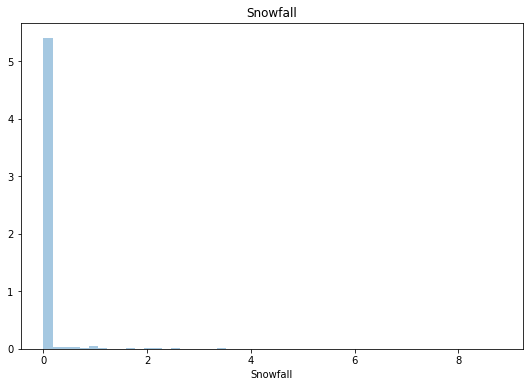

In [95]:
# Chart - 1 visualization code
# Distribution plot for all the numerical features
for col in Numerical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(Data[col]).set(title=col)



##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

##### 2. What is/are the insight(s) found from the chart?

In the plots we observed that some of our columns are right skewed and some are left skewed. We need to apply transformations for make skewness less.

**Right skewed features are**:Rented Bike Counts,Wind speed, Solar Radiation, Rainfall,Snowfall

**left skewed features are **: Visibility , Dew point temperature

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights from the above graphs are positive , because from the above inghts we saw skewness which is caused by the outliers present in the data distribution. By applying the transformations like squre root and square can reduce the outliers and  make the skewed distribution to normal distribution.

#### Chart - 2

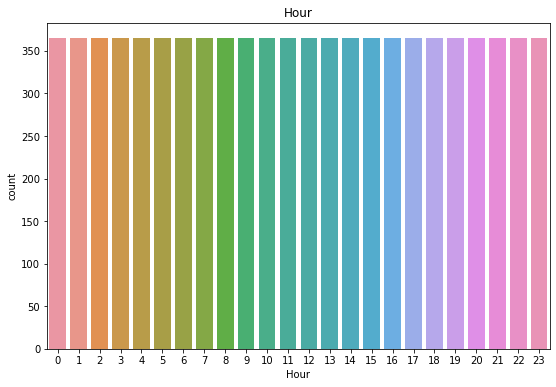

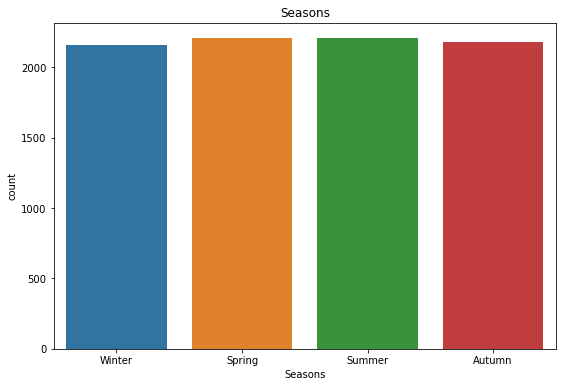

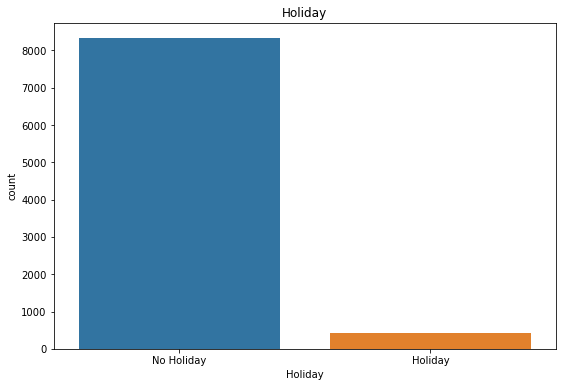

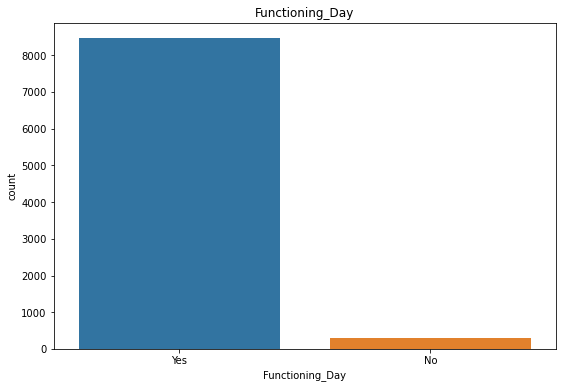

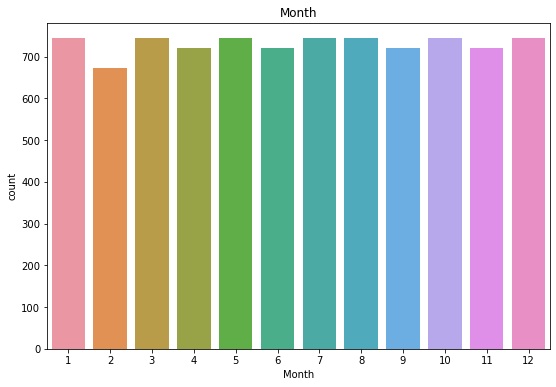

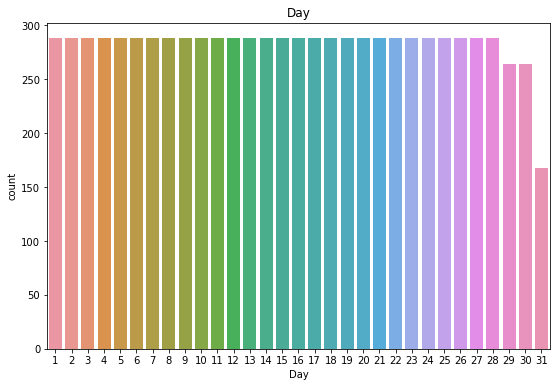

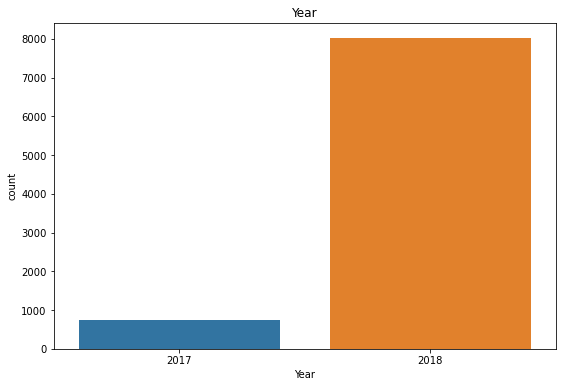

In [96]:
# Chart - 2 visualization code
# coutplot for all the Categorical features
for col in Categorical:
    
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.countplot(data=Data,x=col).set(title=col)

##### 1. Why did you pick the specific chart?

It provides a quick and easy way to visualize the frequency distribution of categorical data. The resulting plot shows the number of occurrences of each category in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above count plots we understood that all the features have almost equal  distribution except the features like **Year , Holiday and Functioning_Day**.

From the countplot of **Year** we found that the Data has only some rows from the year 2017  and many rows of 2018. So the data may started from the last quarter of the Year 2017 . 

From the countplot of **Holiday** we found that very few people rented the bike on the Holiday and Many people rented the bike on No Holiday . Which means People are renting the Bike for the work.

From the countplot of **Funtioning_Day** we found that very few people rented the bike on the *Non Funtioning_Day* and Many people rented the bike on *Funtioning_Day* . Which means People are renting the  Bike for the work and On *Non Funtioning_Day * They are using other ways of transport or taking rest.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The businees impact is positive,Because most of the features are uniformly distributued in all groups

#### Chart - 3

Text(0.5, 1.0, 'Hour V/s Rented_Bike_Count')

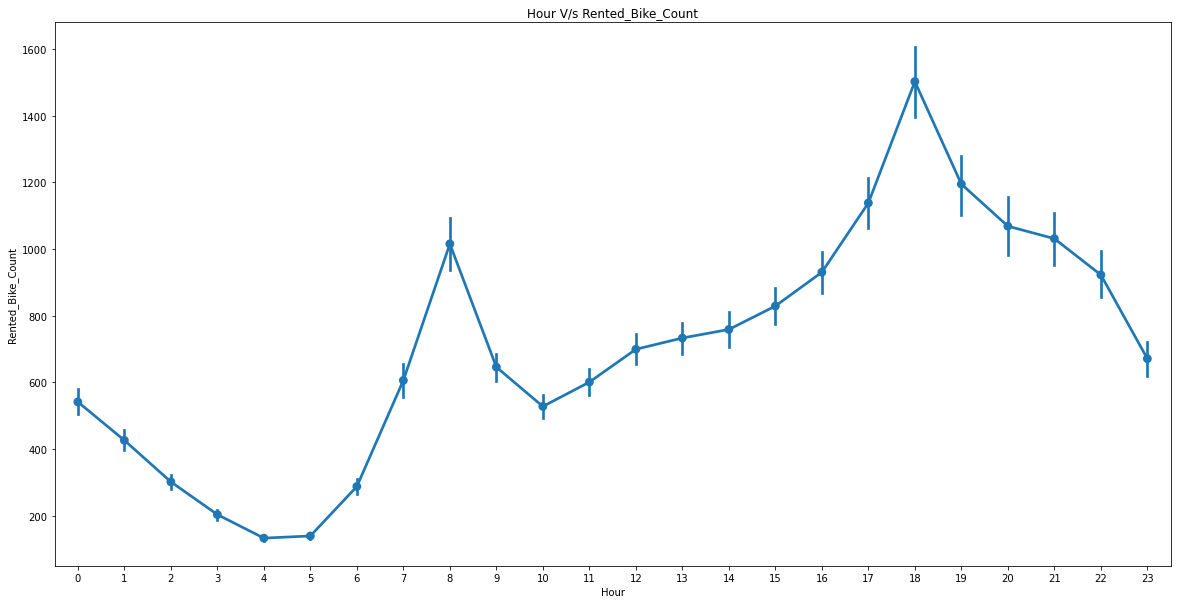

In [97]:
# Chart - 3 visualization code
# pointplot between Hour and rented_Bike_count 
plt.figure(figsize=(20,10))
sns.pointplot(x=Data['Hour'],y=Data['Rented_Bike_Count'])
plt.title('Hour V/s Rented_Bike_Count')

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing



##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that the bike rented are increasing from the Hour 6 to 8, which means the Bike rented are for office use . Then from Hour 16 to  18 the rented bike count is increasing again which is after the working hours for the offices.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the Business Impact is positive. By this we can say that the most number of Bikes getting rented in Peak Office Hour. 

#### Chart - 4

Text(0.5, 1.0, 'Rented Bike Count during different Seasons ')

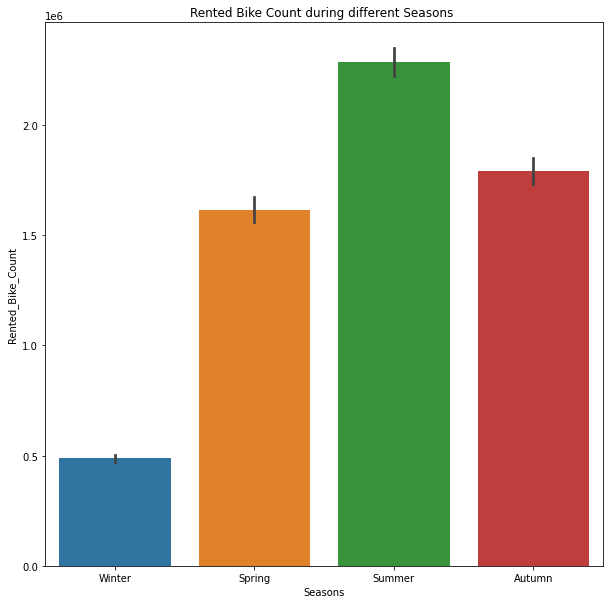

In [98]:
# Chart - 4 visualization code

plt.figure(figsize=(10,10))

sns.barplot(x=Data['Seasons'],y=Data['Rented_Bike_Count'],estimator=np.sum)
plt.title(f"Rented Bike Count during different Seasons ")




##### 1. Why did you pick the specific chart?

Bar plots are a popular choice for displaying and comparing categorical data. They are effective in showing the frequency or distribution of different categories in a dataset. Bar plots can also be used to compare the values of a categorical variable across different groups or subgroupsre.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say that in Season Summer the most number of bikes rented . And we can see that the Bike rented started increasing  from the season spring and it hit it's peak in Summer Season. Slightly decreased in Autumn and the hit the lowest in season winted.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the above has a positive business impact, Because we can see that the most number of bikes are rented in Summer , Autumn and Spring . For Winter People not rent the bike because of cold weather

#### Chart - 5

Text(0.5, 1.0, 'Temperature V/S Dew_point_temperature')

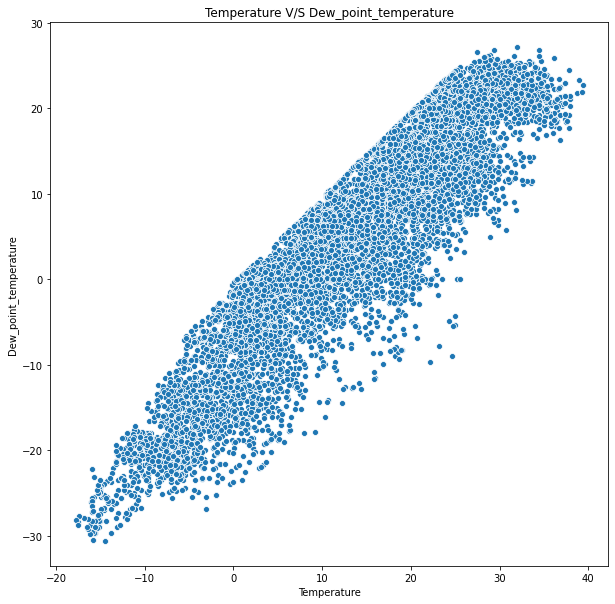

In [99]:
# Chart - 5 visualization code
plt.figure(figsize=(10,10))

sns.scatterplot(x=Data['Temperature'],y=Data['Dew_point_temperature'])
plt.title('Temperature V/S Dew_point_temperature')

##### 1. Why did you pick the specific chart?

Scatterplot is used to obeserve the relation between two numerical variables, Also we can find the correlation between the features.

##### 2. What is/are the insight(s) found from the chart?

We can see there is the high positive  correlation between Dew_point_temperature and Temperature. 





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Bussiness Impact if positive from the above graph. Because with high correlation between these feature we can drop Dew_Point_Temperature from the DataFrame

#### Chart - 6

Text(0.5, 1.0, 'Temperature V/S Humidity')

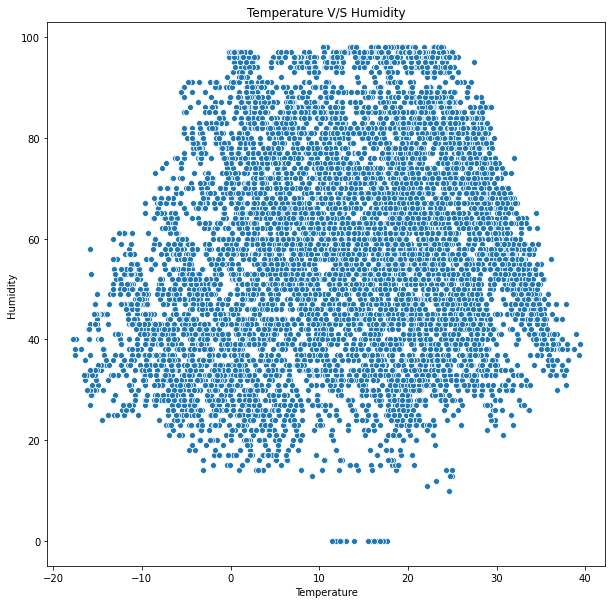

In [100]:
# Chart - 6 visualization code
plt.figure(figsize=(10,10))

sns.scatterplot(x=Data['Temperature'],y=Data['Humidity'])
plt.title('Temperature V/S Humidity')

##### 1. Why did you pick the specific chart?

Scatterplot is used to obeserve the relation between two numerical variables, Also we can find the correlation between the features.*italicized text*

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that there are outliers present in the above graph which doesn;t fit the pattern.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having outliers can impact the business neagatively, Because the outliers can be few in numbers but can impact the standatd deviation because of the very small or very large value.

#### Chart - 7

Text(0.5, 1.0, 'Hour V/s Rented_Bike_Count with respective Holiday')

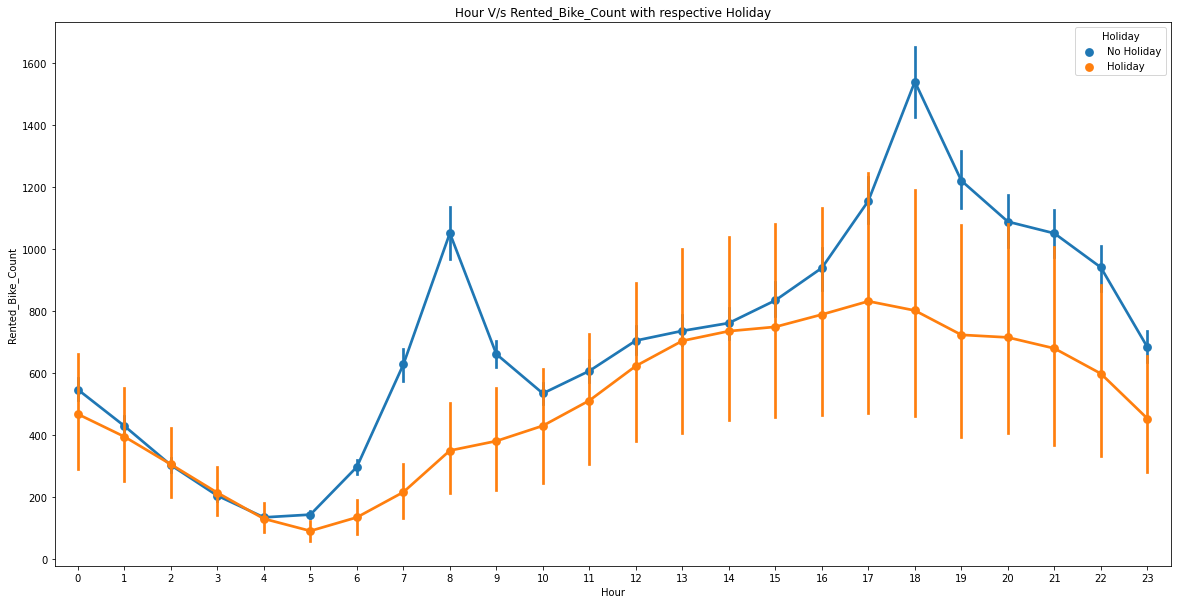

In [101]:
# Chart - 7 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Holiday')
plt.title("Hour V/s Rented_Bike_Count with respective Holiday")

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that the Bike Rental Count on Holiday is less for all hours and for Holiday the increase in Bike Rental if found at 8AM and it hit the peak on 17(7PM). On No Holiday  the bike rented are increasing from the Hour 6 to 8, which means the Bike rented are for office use . Then from Hour 16 to 18 the rented bike count is increasing again which is after the working hours for the offices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Bussiness Impact if negative from the above graph. We can say that on Holiday the bike rental is less with compared to No Holiday

#### Chart - 8

Text(0.5, 1.0, 'Hour V/s Rented_Bike_Count with respective Functioning_Day')

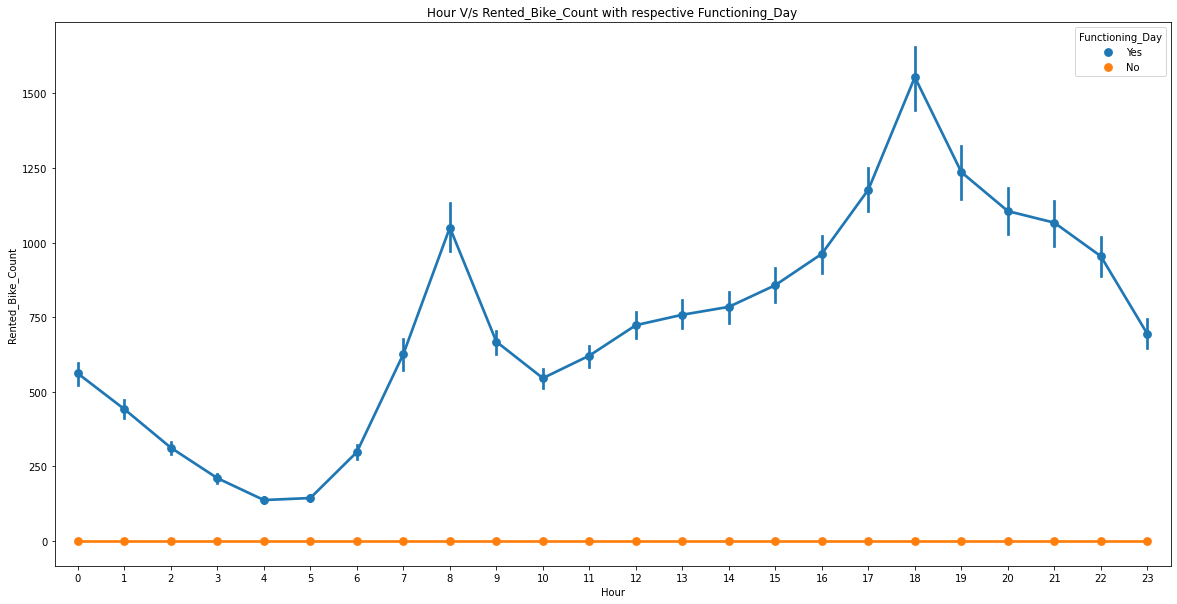

In [102]:
# Chart - 8 visualization code

plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day')
plt.title("Hour V/s Rented_Bike_Count with respective Functioning_Day")

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that the Bike rental on non funtioning day is zero, which means no one rented the bike on Non Funtioning day. On Funtioning_Day the bike rented are increasing from the Hour 6 to 8, which means the Bike rented are for office use . Then from Hour 16 to 18 the rented bike count is increasing again which is after the working hours for the offices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Business impact from the above graph is negative . Because we can see that on Non Funtioning day people don't rent the bikes,But the count of Non Funtioning days is so small It might not impact that much for business".

#### Chart - 9

Text(0.5, 1.0, 'Hour V/s Rented_Bike_Count with respective Seasons')

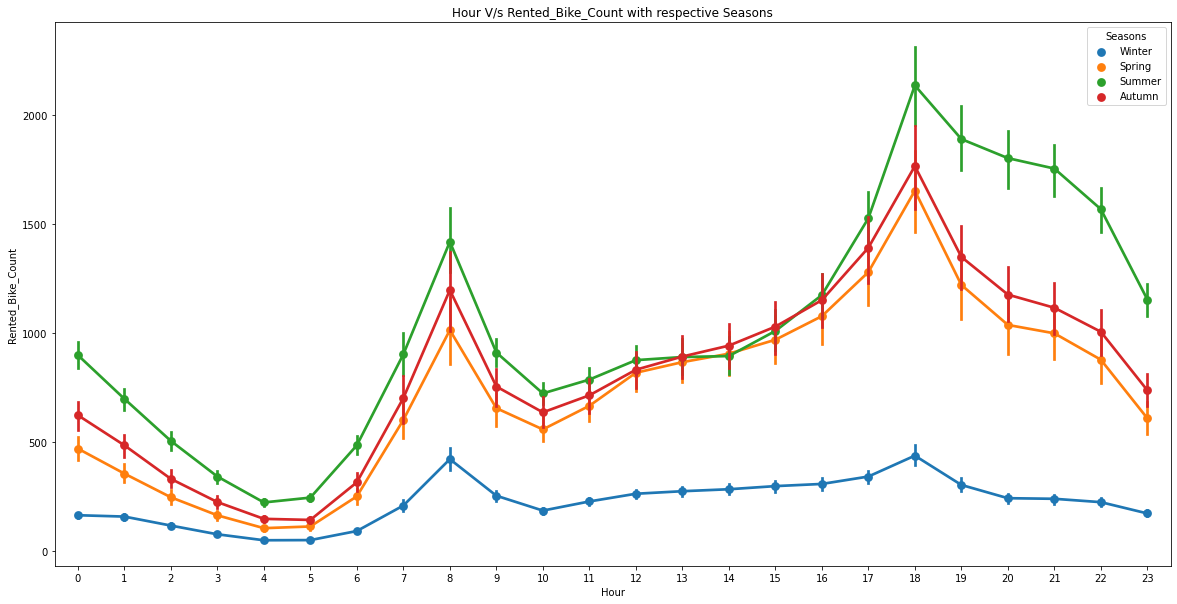

In [103]:
# Chart - 9 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Seasons')
plt.title("Hour V/s Rented_Bike_Count with respective Seasons")

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing

##### 2. What is/are the insight(s) found from the chart?

The pattern of Bike rental by hour is similar in all seasons . But we can say that very less number of people rent bikes in winter due to cold weather.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Business impact is negative . Due to cold weather people rent less bike to avoid accidents .

#### Chart - 10

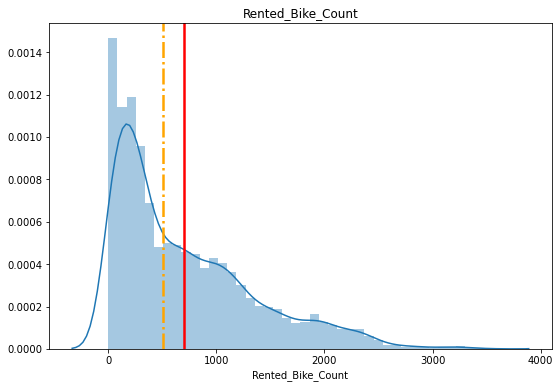

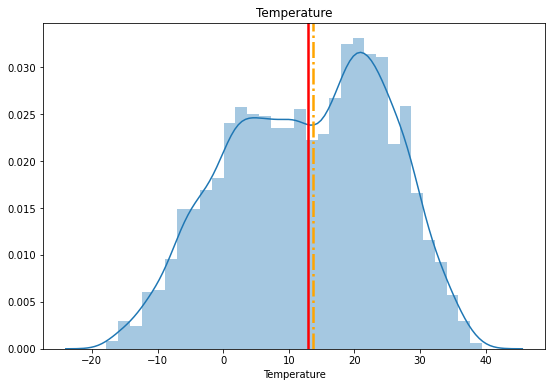

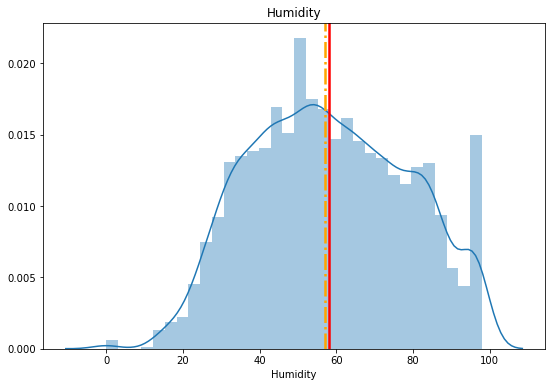

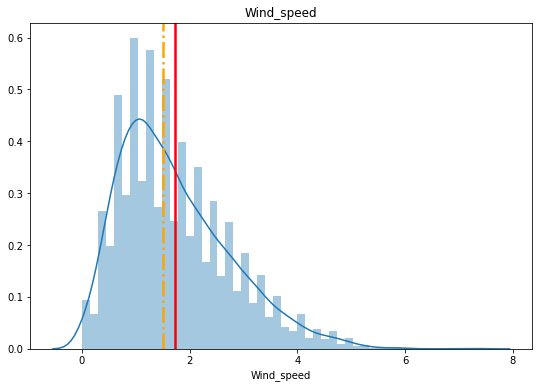

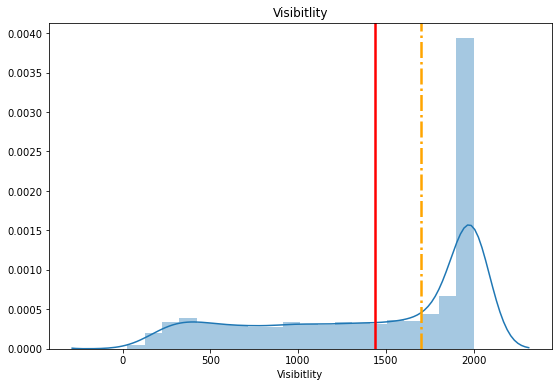

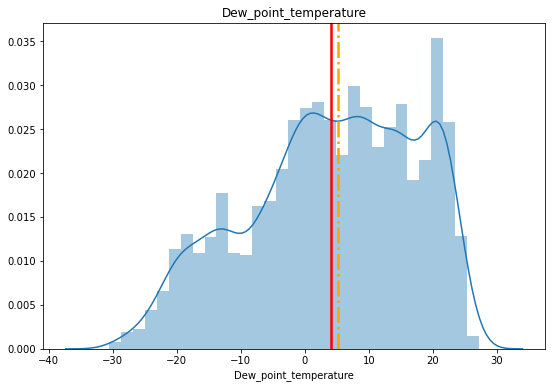

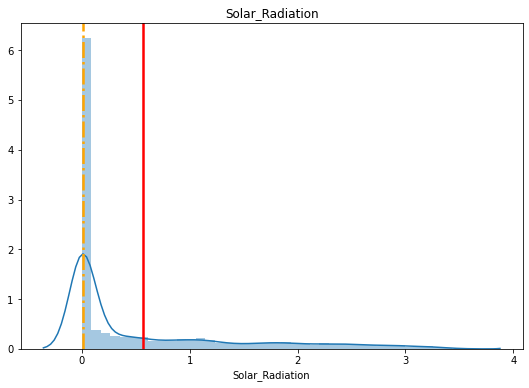

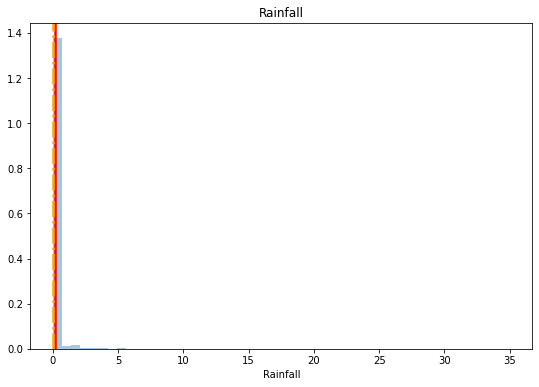

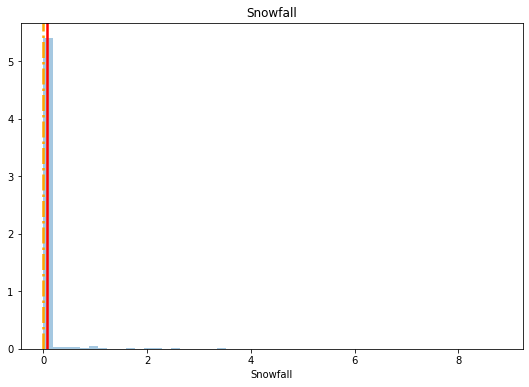

In [104]:
# Chart - 10 visualization code
# Distribution plot for all the numerical features with mean and median lines
for col in Numerical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(Data[col]).set(title=col)
    ax.axvline(x=Data[col].mean(), c='red', ls='-', lw=2.5)
    ax.axvline(x=Data[col].median(), c='orange', ls='dashdot', lw=2.5)

##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

##### 2. What is/are the insight(s) found from the chart?

In the plots we observed that some of our columns are right skewed and some are left skewed. We need to apply transformations for make skewness less.

**Right skewed features are**:Rented Bike Counts,Wind speed, Solar Radiation, Rainfall,Snowfall

**left skewed features are **: Visibility , Dew point temperature

For Rainfall,Snowfall and Solar Radiation most number of values are 0 .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph the impact is Positvie. Because we need to transform data to make the distribution normal.


#### Chart - 11

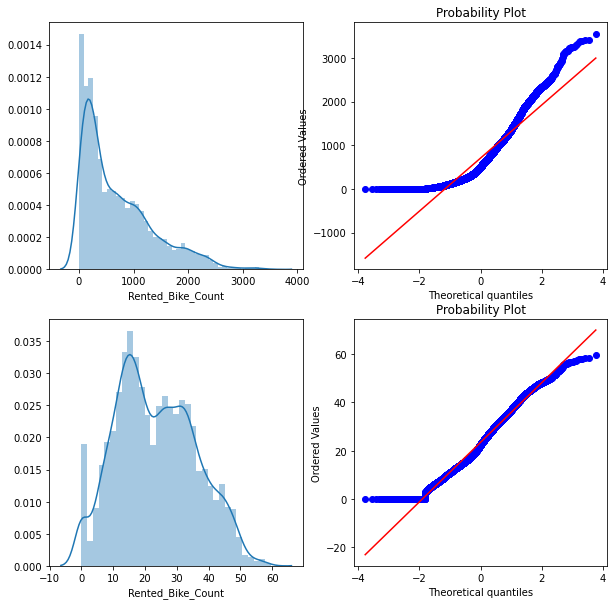

In [105]:
# Chart - 11 visualization code
# plots for values before transformation
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(Data['Rented_Bike_Count'])

plt.subplot(2,2,2)
probplot(Data['Rented_Bike_Count'], dist='norm',plot=plt,)
# Plots of the values after sqrt transformation 
plt.subplot(2,2,3)
sns.distplot(np.sqrt(Data['Rented_Bike_Count']))
plt.subplot(2,2,4)
probplot(np.sqrt(Data['Rented_Bike_Count']), dist='norm',plot=plt)
plt.show()



##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

Probplot says about how many values lie in a normal Distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that after the square root trasformation of Rented_Bike_Count the distribution became normal from Left skewed. And by this more number of points are on the normal line

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We  got the positve Business impact from the above graphs , Becasue from it we can see more number of points are on normal line.




#### Chart - 12

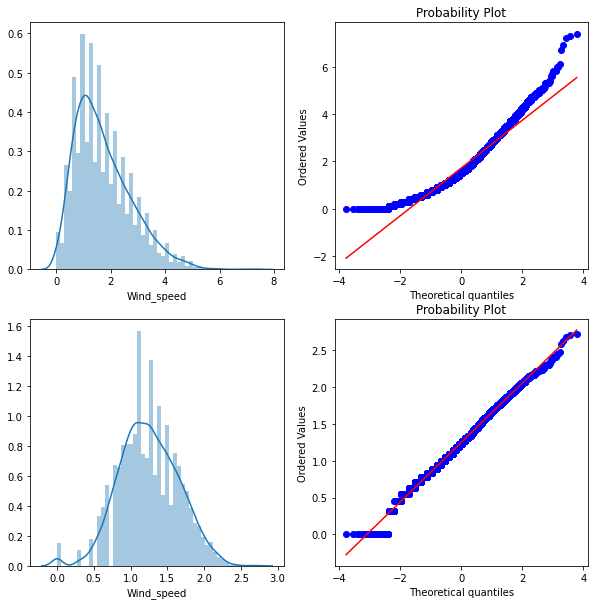

In [106]:
# Chart - 12 visualization code
# plots for values before transformation

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(Data['Wind_speed'])

plt.subplot(2,2,2)
probplot(Data['Wind_speed'], dist='norm',plot=plt,)

# Plots of the values after sqrt transformation 

plt.subplot(2,2,3)
sns.distplot(np.sqrt(Data['Wind_speed']))

plt.subplot(2,2,4)
probplot(np.sqrt(Data['Wind_speed']), dist='norm',plot=plt)
plt.show()

##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

Probplot says about how many values lie in a normal Distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that after the square root trasformation of Wind_speed the distribution became normal from Left skewed. And by this more number of points are on the normal line

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We  got the positve Business impact from the above graphs , Becasue from it we can see more number of points are on normal line.

#### Chart - 13

Text(0.5, 1.0, 'Hour V/s Rented_Bike_Count with respective Seasons')

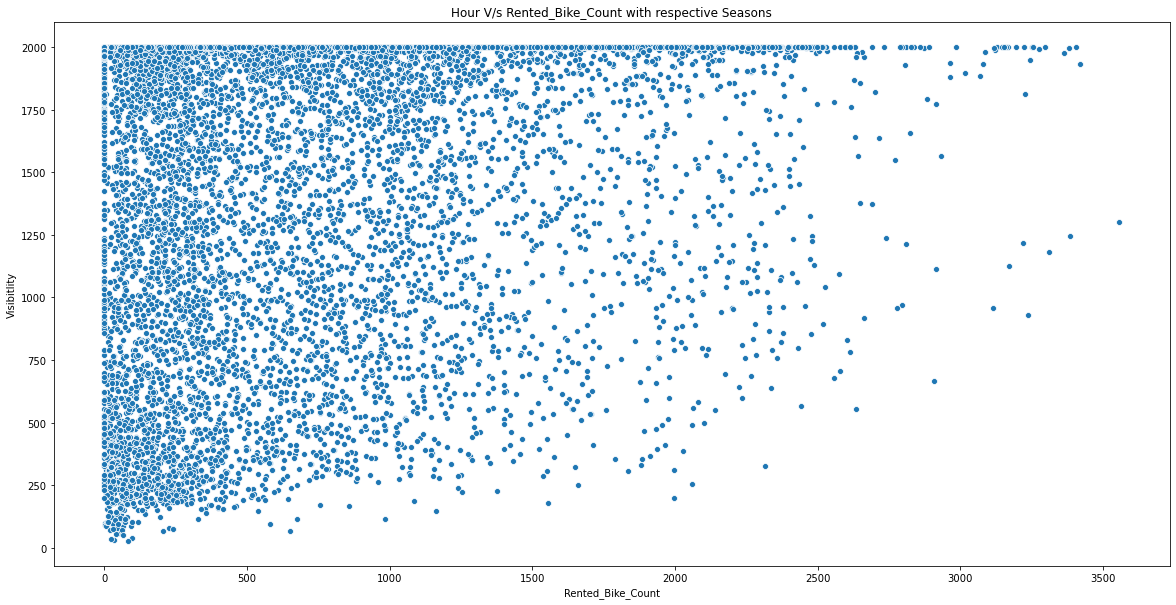

In [107]:
# Chart - 13 visualization code
plt.figure(figsize=(20,10))

sns.scatterplot(data=Data,x='Rented_Bike_Count',y='Visibitlity')
plt.title("Hour V/s Rented_Bike_Count with respective Seasons")

##### 1. Why did you pick the specific chart?

Scatterplot is used to obeserve the relation between two numerical variables, Also we can find the correlation between the features.

##### 2. What is/are the insight(s) found from the chart?

From the above graph I found that most points are on Zero and for Visibility the
the Max is 2000 and the more points are there at Visibility 2000





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having outliers can impact the business neagatively, Because the outliers can be few in numbers but can impact the standatd deviation because of the very small or very large value.

#### Chart - 14 - Correlation Heatmap

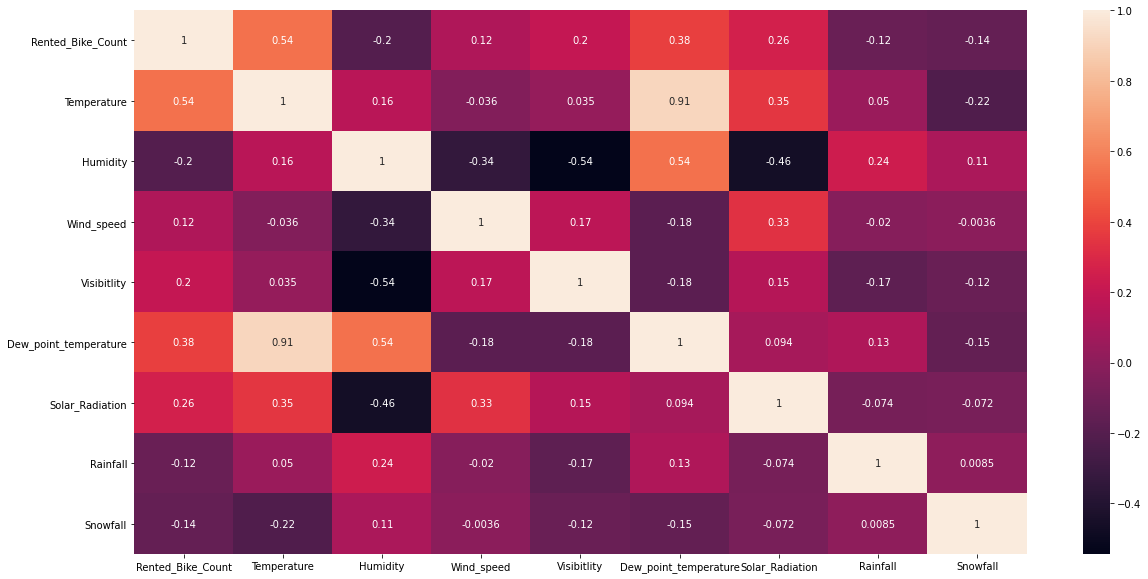

In [108]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(Data[Numerical].corr(),annot=True)

##### 1. Why did you pick the specific chart?

Heatmap helps us to find the correlation between the numerical feature. So that we can drop one from highly correlated feature.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can say that Dew_point_temperatue and Temperature have high correlation of 91% so we drop one from them.
For the target variable feature temperature has high correlation of 54%.

#### Chart - 15 - Pair Plot 

<Figure size 1440x720 with 0 Axes>

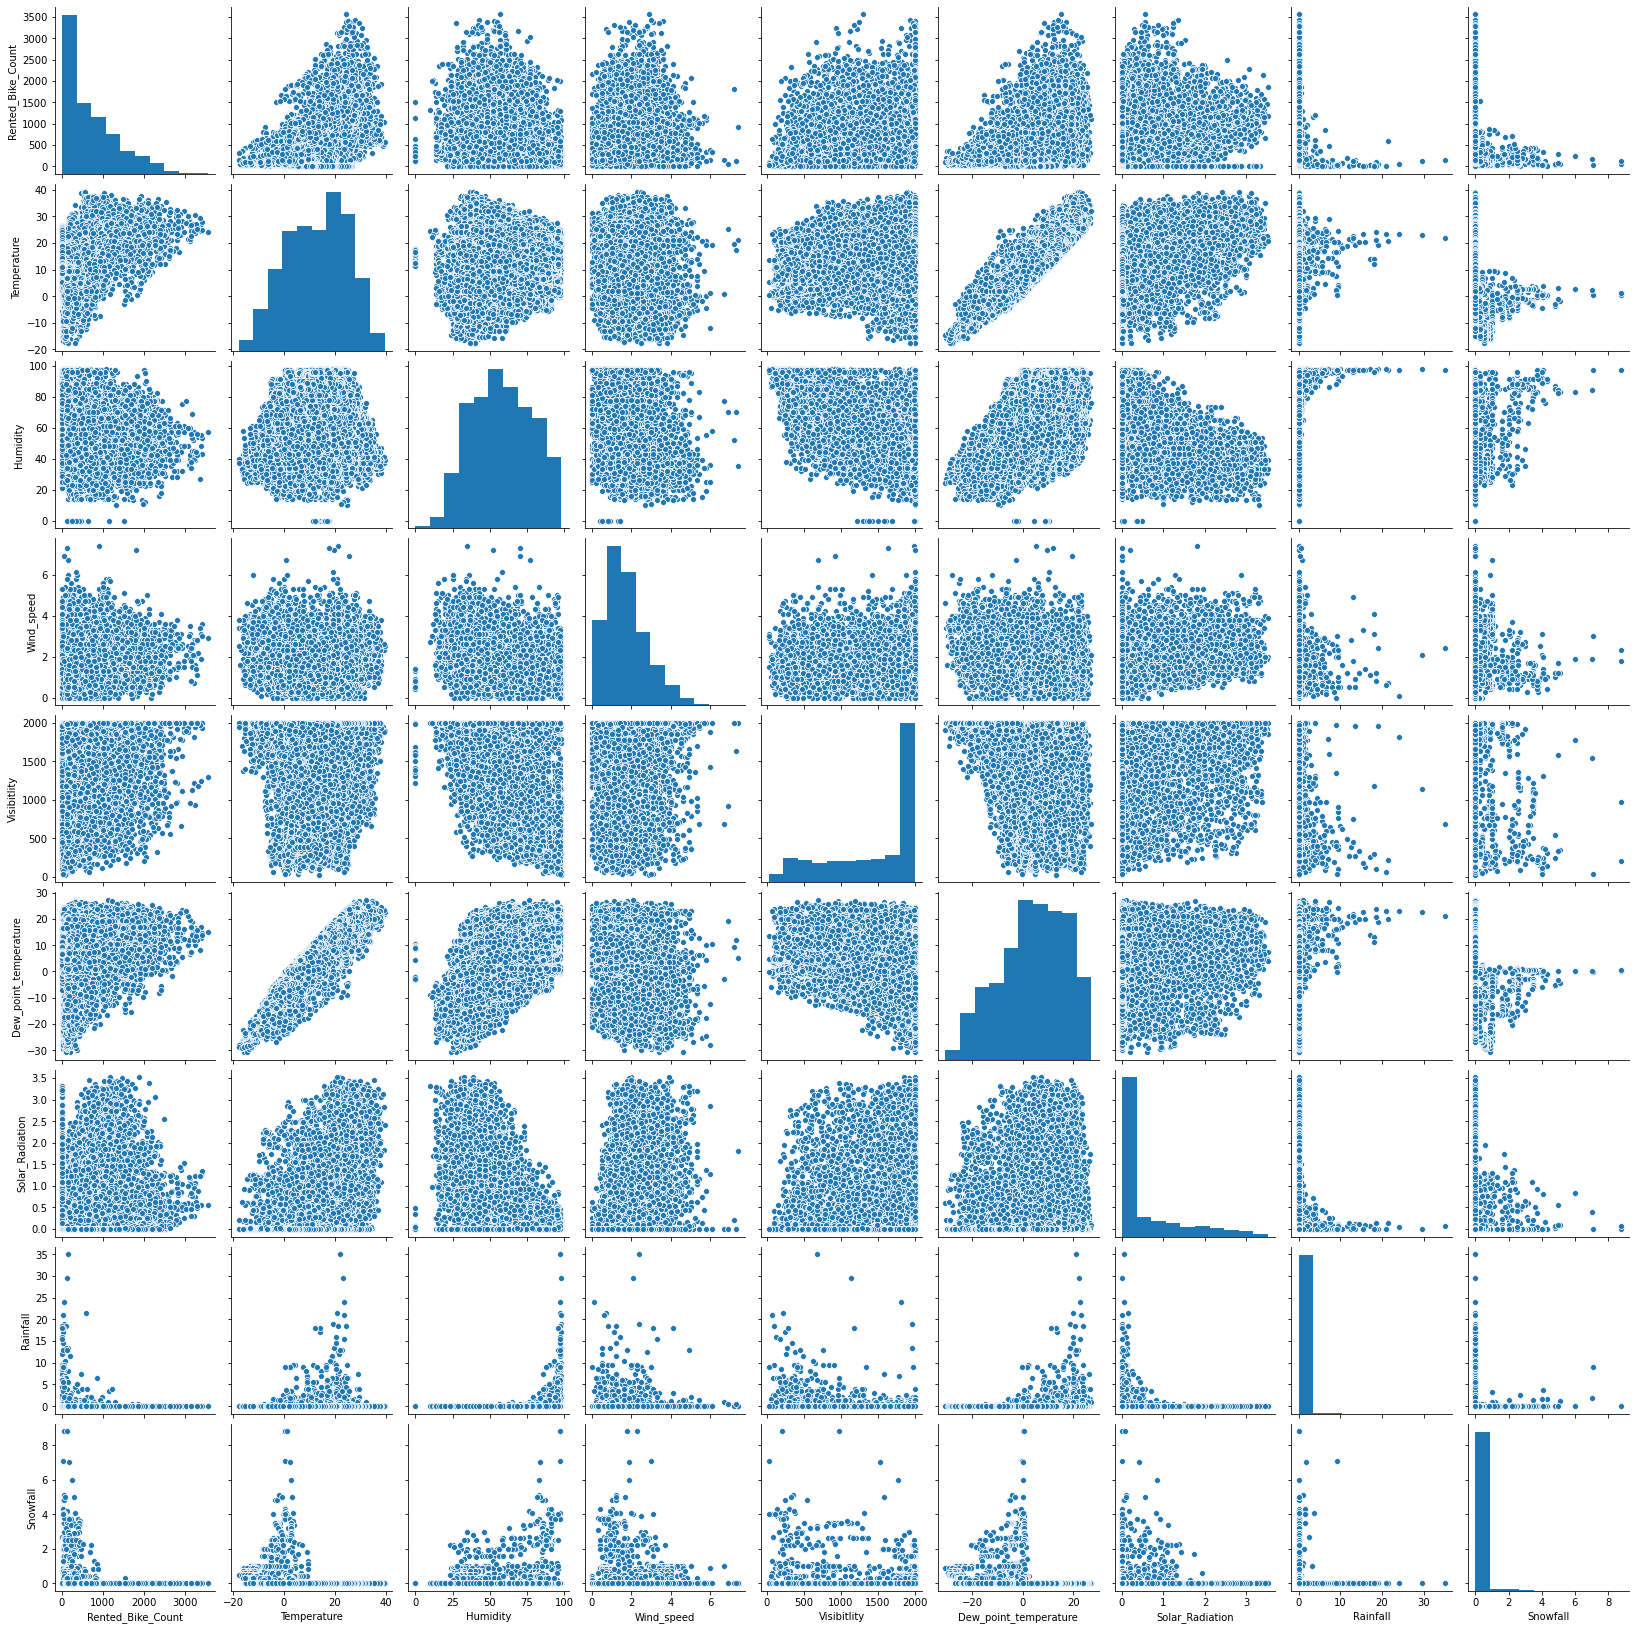

In [110]:
# Pair Plot visualization code
plt.figure(figsize=(20,10))
sns.pairplot(data=Data[Numerical])

##### 1. Why did you pick the specific chart?

By plotting all possible pairs of variables, we can easily see how different variables are related to one another. It helps in Identifying Outliers for all pairs



##### 2. What is/are the insight(s) found from the chart?

From the graph we can say that there is high positive correlation between the Temperature and Dew_point Temperature.
For Snowfall rainfall and Solar_Radiation the most values are 0




## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if the mean bike rental count is significantly different between weekdays and weekends:**

**Null Hypothesis (H0):** There is no significant difference in the mean bike rental count between weekdays and weekends.

**Alternative Hypothesis (HA):** The mean bike rental count is significantly different between weekdays and weekends.



#### 2. Perform an appropriate statistical test.

In [111]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind
#assigning alpha 
alpha=0.05

# Create a new column for day of week
Data['weekday'] = Data['Date'].dt.dayofweek

# Split the dataset into weekdays and weekends
weekdays = Data[Data['weekday'] < 5]['Rented_Bike_Count']
weekends = Data[Data['weekday'] >= 5]['Rented_Bike_Count']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(weekdays, weekends)
if p_value<alpha:
  print("We  reject the null hypothesis and conclude that the mean bike rental counts are significantly different between weekdays and weekends.")
else:
  print("We failed to reject the null hypothesis and conclude that there is no significant difference between the means two groups.")
# Print the results

print('T-statistic: ', t_stat)
print('P-value: ', p_value)

We  reject the null hypothesis and conclude that the mean bike rental counts are significantly different between weekdays and weekends.
T-statistic:  3.0205383403487915
P-value:  0.002530536351376407


##### Which statistical test have you done to obtain P-Value?

 I had done T-Test to obtain the P-Value and and found the result that Null hypothesis has been rejected

##### Why did you choose the specific statistical test?

T-test is used to compare the difference between the two groups of Data. Like for comparing the means of Rented_Bike_Count for group  Weekday and Weekend

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if there is a significant correlation between temperature and bike rental count:**

**Null Hypothesis (H0)**: There is no significant correlation between temperature and bike rental count.

**Alternative Hypothesis (HA)**: There is a significant correlation between temperature and bike rental count.

#### 2. Perform an appropriate statistical test.

In [112]:
from scipy.stats import pearsonr
# Obtaining P-value uning  pearsonr 
corr, p_value = pearsonr(Data['Temperature'], Data['Rented_Bike_Count'])

# Print the results
if p_value < alpha:
    print('Reject Null Hypothesis. There is a significant correlation between temperature and bike rental count.')
else:
    print('Fail to reject Null Hypothesis. There is no significant correlation between temperature and bike rental count.')
print('Correlation coefficient:', corr)
print('P-value:', p_value)

Reject Null Hypothesis. There is a significant correlation between temperature and bike rental count.
Correlation coefficient: 0.5385581530139789
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used the Personr test to Obtain P-Value and found the result that Null hypothesis has been rejected

##### Why did you choose the specific statistical test?

Pearsonr test is used to find the correlation between temperature and Rented_Bike_Count.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if the mean bike rental count is significantly different between different seasons:**

**Null Hypothesis (H0):** There is no significant difference in the mean bike rental count between different seasons.

**Alternative Hypothesis (HA):** The mean bike rental count is significantly different between different seasons.

#### 2. Perform an appropriate statistical test.

In [113]:
# Perform Statistical Test to obtain P-Value
# An 2d Array which contains the values pf all seasons
annova_array=[]
for i in Data['Seasons'].unique():
  annova_array.append(Data[Data['Seasons']==i]['Rented_Bike_Count'])
# perform one-way ANOVA

f,p_value=f_oneway(*annova_array)

if p_value < alpha:
    print('Reject Null Hypothesis. The mean bike rental count is significantly different between different seasons.')
else:
    print('Fail to reject Null Hypothesis. The mean bike rental count is not significantly different between different seasons.')


Reject Null Hypothesis. The mean bike rental count is significantly different between different seasons.


##### Which statistical test have you done to obtain P-Value?

I used One Way Anova to obtain P-Value and found the result that Null hypothesis has been rejected.

##### Why did you choose the specific statistical test?

It is used to analyze the variance between independent and dependent features and find the singnificant difference in different seasons groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [114]:
# Handling Missing Values & Missing Value Imputation

Data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibitlity              0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Day                      0
Month                    0
Year                     0
weekday                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Found No Null Values

### 2. Handling Outliers

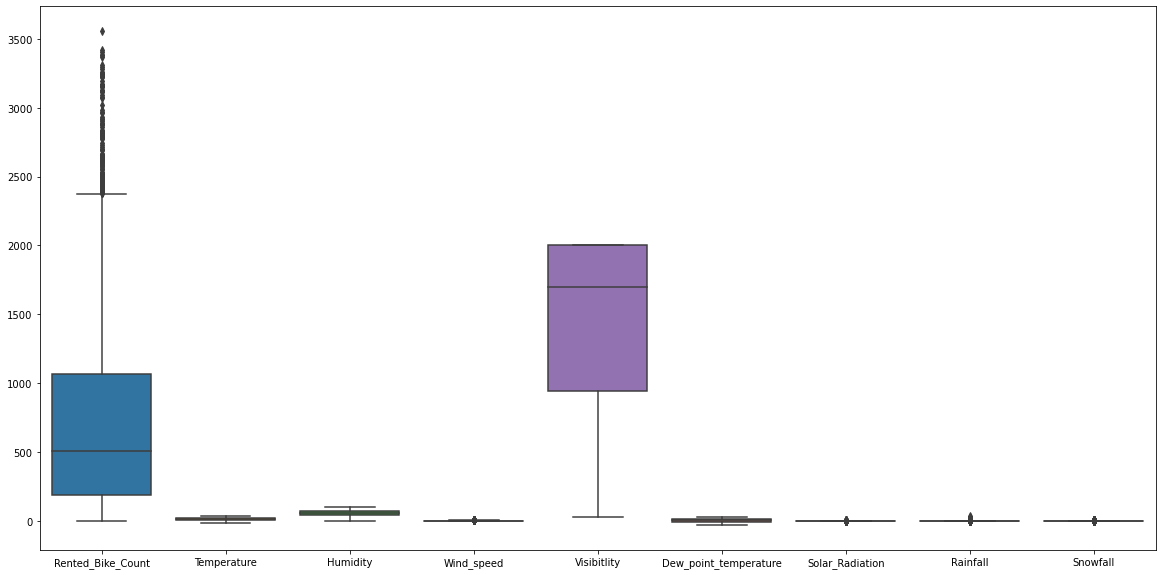

In [115]:
# Handling Outliers & Outlier treatmentsD
plt.figure(figsize=(20,10))
sns.boxplot(data=Data[Numerical])

In [116]:
def outlier_capping(data):
  # calculate the first and third quartiles of the Data
  Q1=np.quantile(data,0.25)
  Q3=np.quantile(data,0.75)
  # calculate the Interquartile range
  Iqr=Q3-Q1
  # calculate the lower and upper bounds for the outliers

  lower_bound=Q1-1.5*Iqr
  upper_bound=Q3+1.5*Iqr

  # Data without outliers
  cleaned_data=[]
  for i in data:
    if i < lower_bound:
      cleaned_data.append(lower_bound)
    elif i > upper_bound:
      cleaned_data.append(upper_bound)
    else:
      cleaned_data.append(i)
  return cleaned_data
# Let's treat outliers in Rented_bike_count
Data['Rented_Bike_Count']=outlier_capping(Data['Rented_Bike_Count'])


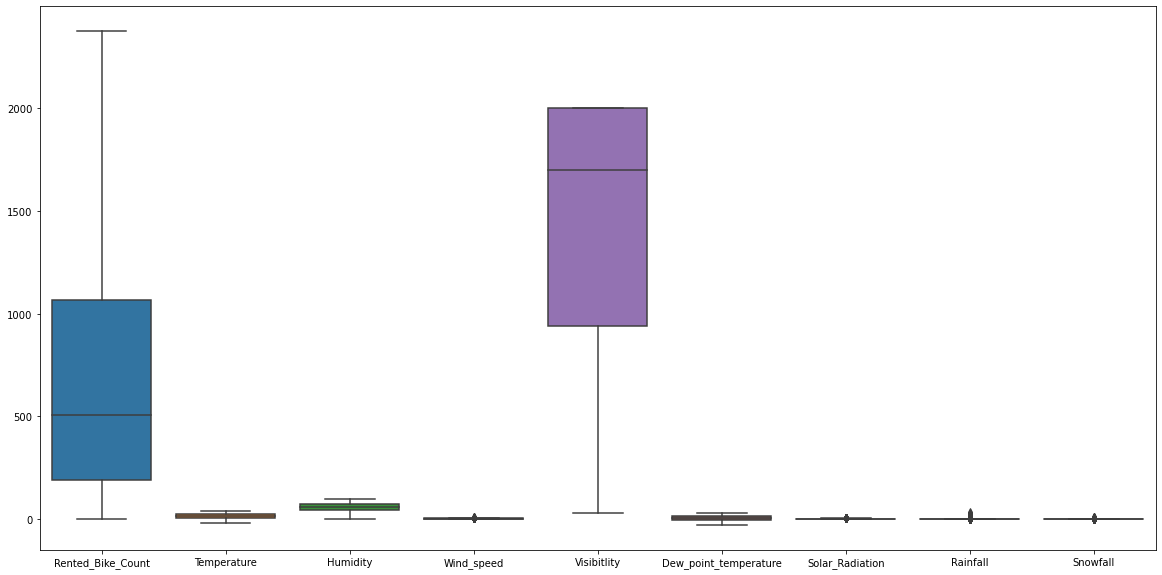

In [117]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Data[Numerical])

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used Outlier capping to remove the outliers, Because this technique caps the Outliers Greater than Upper_bound with upper bound and Outliers Less than Lower Bound with lower bound

### 3. Categorical Encoding

In [118]:
# Encode your categorical columns

encoded_data= Data.apply(LabelEncoder().fit_transform)
encoded_data.head()


Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0     0                253     0          111        28          22   
1     0                203     1          108        29           8   
2     0                172     2          103        30          10   
3     0                106     3          101        31           9   
4     0                 77     4          103        27          23   

   Visibitlity  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0         1788                    114                0         0         0   
1         1788                    114                0         0         0   
2         1788                    113                0         0         0   
3         1788                    114                0         0         0   
4         1788                    104                0         0         0   

   Seasons  Holiday  Functioning_Day  Day  Month  Year  weekday  
0        3        1                1   11      0     0        3  
1        3        1                1   11      0     0        3  
2        3        1                1   11      0     0        3  
3        3        1                1   11      0     0        3  
4        3        1                1   11      0     0        3

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoder for encoding the categorical .Because when there are only two possible values of a categorical features. 

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [119]:
# Expand Contraction

#### 2. Lower Casing

In [120]:
# Lower Casing

#### 3. Removing Punctuations

In [121]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [122]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [123]:
# Remove Stopwords

In [124]:
# Remove White spaces

#### 6. Rephrase Text

In [125]:
# Rephrase Text

#### 7. Tokenization

In [126]:
# Tokenization

#### 8. Text Normalization

In [127]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [128]:
# POS Taging

#### 10. Text Vectorization

In [129]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [130]:
# Manip/ulate Features to minimize feature correlation and create new features
encoded_data.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0     0                253     0          111        28          22   
1     0                203     1          108        29           8   
2     0                172     2          103        30          10   
3     0                106     3          101        31           9   
4     0                 77     4          103        27          23   

   Visibitlity  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0         1788                    114                0         0         0   
1         1788                    114                0         0         0   
2         1788                    113                0         0         0   
3         1788                    114                0         0         0   
4         1788                    104                0         0         0   

   Seasons  Holiday  Functioning_Day  Day  Month  Year  weekday  
0        3        1                1   11      0     0        3  
1        3        1                1   11      0     0        3  
2        3        1                1   11      0     0        3  
3        3        1                1   11      0     0        3  
4        3        1                1   11      0     0        3

In [131]:

# Let's Drop Date and Dew_point_temperature
encoded_data.drop(columns=['Date','Dew_point_temperature','weekday'],axis=1,inplace=True)



#### 2. Feature Selection

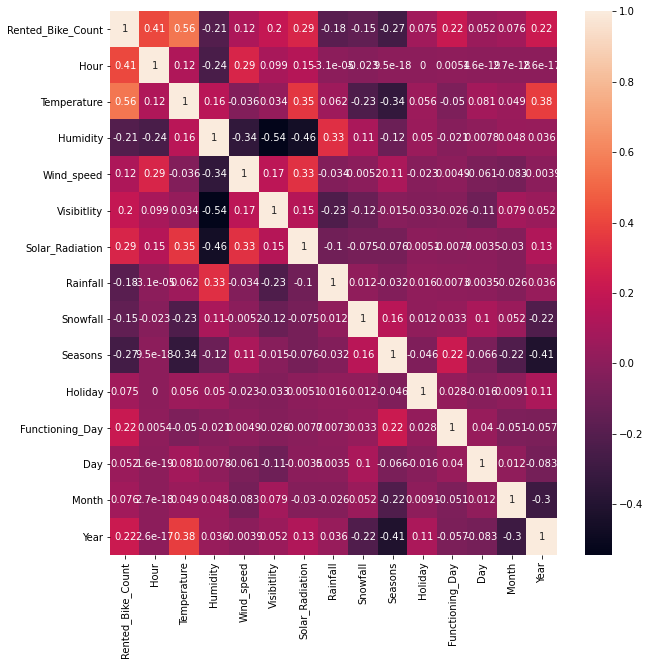

In [132]:
# Select your features wisely to avoid overfitting

#Checking for Multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(encoded_data.corr(),annot=True)


##### What all feature selection methods have you used  and why?

we have less feature so we are slecting all features above

##### Which all features you found important and why?

Temperature and Hour have the high correlartion with Rented_Bike_Count. So I found they are important

### 5. Data Transformation

In [133]:
encoded_data['Rented_Bike_Count']=np.sqrt(encoded_data['Rented_Bike_Count'])
encoded_data['Wind_speed']=np.sqrt(encoded_data['Wind_speed'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Yes we need to transform data, The Transformation for Rented_Bike_Count and WindWind_Speed is need because the are skewed . To make them normal distribution we used square root transformation.

### 6. Data Scaling

In [134]:
# Scaling your data
X=encoded_data.drop(['Rented_Bike_Count'],axis=1)
Y=encoded_data['Rented_Bike_Count']
# I'm Scaling the Data after  spliting the Data  to avoid the Data Leakage
X.head()

Hour  Temperature  Humidity  Wind_speed  Visibitlity  Solar_Radiation  \
0     0          111        28    4.690416         1788                0   
1     1          108        29    2.828427         1788                0   
2     2          103        30    3.162278         1788                0   
3     3          101        31    3.000000         1788                0   
4     4          103        27    4.795832         1788                0   

   Rainfall  Snowfall  Seasons  Holiday  Functioning_Day  Day  Month  Year  
0         0         0        3        1                1   11      0     0  
1         0         0        3        1                1   11      0     0  
2         0         0        3        1                1   11      0     0  
3         0         0        3        1                1   11      0     0  
4         0         0        3        1                1   11      0     0

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No , dimensionality reduction not needed because we have less number of feature .

In [135]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


### 8. Data Splitting

In [136]:
# Split your data to train and test. Choose Splitting ratio wisely.


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
# Spliting the test Data to X_val and X_test
X_test,X_val,Y_test,Y_val=train_test_split(X_test,Y_test,test_size=0.1,random_state=42)
# Scaling Data after spliting
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
X_val=Scaler.transform(X_val)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("X_val shape",X_val.shape)

X_train shape (6132, 14)
X_test shape (2365, 14)
X_val shape (263, 14)


##### Which method have you used to scale you data and why?

The Standard Scaler scales the data in such a way that the mean is 0 and the standard deviation is 1. This means that the features will have a similar range of values and that the distribution of each feature will be centered around 0. This helps to prevent the dominance of certain features in the model and ensures that each feature is given equal importance during the training process.

##### What data splitting ratio have you used and why? 

The Ratio of train : test :val is 70:20:10, we used this ratio so that model can train form 70% data and avoid overfitting.





### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [137]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [138]:
# ML Model - 1 Implementation
# create the result DataFrame
result_Df=pd.DataFrame()
# Defining the Model
rf=RandomForestRegressor(n_estimators=100)

# Fit the Algorithm
rf.fit(X_train,Y_train)

# Predict on the model
y_predict_train=rf.predict(X_train)
y_predict_test=rf.predict(X_test)
# Adding the scores to resultDF
result_dict={
    'Model':'RandomForestRegressor',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}




result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df

Model  Test_MAE   Test_MSE  Test_RMSE  Test_r2_score  \
0  RandomForestRegressor   2.40051  13.388648    3.65905       0.889032   

   Train_MAE  Train_MSE  Train_RMSE  Train_r2_score  
0   0.885217   1.817957    1.348316        0.986171

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

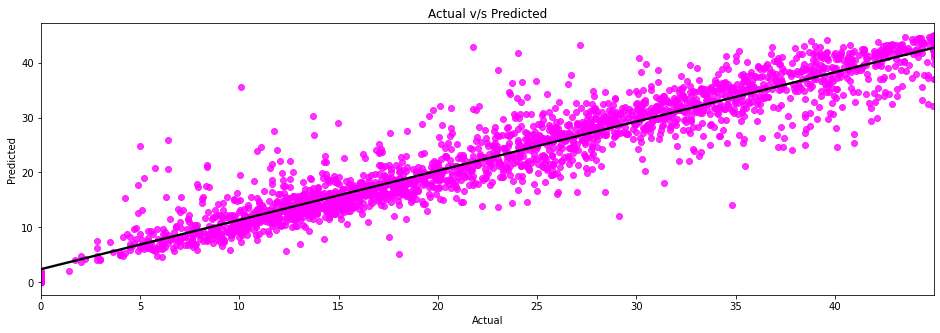

In [139]:
# Visualizing evaluation Metric Score chart
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


plot_scatter(y_predict_test,Y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [140]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}
# Esitmator model
rf_reg=RandomForestRegressor()
# Declare the GridSearchCV model
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
# fit the algorithm
rf_tuning.fit(X_train,Y_train)
# Getting the best parameters
rf_tuning.best_params_



{'max_depth': 9, 'n_estimators': 100}

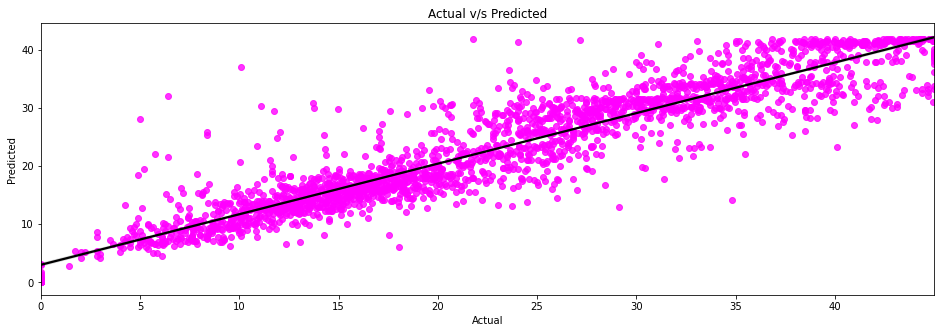

In [141]:

# Predict on the model
y_predict_train=rf_tuning.predict(X_train)
y_predict_test=rf_tuning.predict(X_test)
# Adding the scores to resultDF

result_dict={
    'Model':'RandomForestRegressor_GridSearchCV',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}

result_Df=result_Df.append(result_dict,ignore_index=True)

plot_scatter(y_predict_test,Y_test)

In [142]:
result_Df

Model  Test_MAE   Test_MSE  Test_RMSE  \
0               RandomForestRegressor  2.400510  13.388648   3.659050   
1  RandomForestRegressor_GridSearchCV  2.796694  16.559196   4.069299   

   Test_r2_score  Train_MAE  Train_MSE  Train_RMSE  Train_r2_score  
0       0.889032   0.885217   1.817957    1.348316        0.986171  
1       0.857871   2.333904  10.965952    3.311488        0.909798

 99%|===================| 2351/2365 [01:27<00:00]        

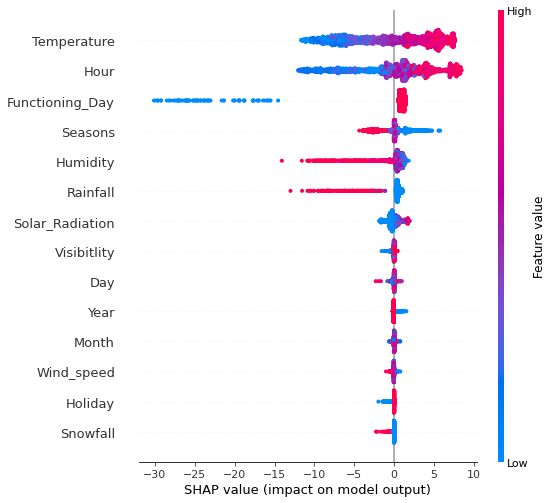

In [143]:
# # Calculate SHAP values
explainer = shap.TreeExplainer(rf_tuning.best_estimator_, X_train,check_additivity=False)

# Generate SHAP values for your test data
shap_values = explainer.shap_values(X_test,check_additivity=False)
shap.summary_plot(shap_values, X_test,feature_names=)

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV.GridSearchCV is often preferred because it exhaustively searches through all possible hyperparameter combinations, guaranteeing that the optimal values will be found within the specified range.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes I have see the imporvement because For RandomForestRegressor there is a lot of difference in between Test MAE and Train MAE, Test MSE and Train MSE, Test RMSE and Train RMSR and The R2_score for Train is 0.98 and for Test is 0.88. This means the Model is **Overfitting**. After Tuning the hyperparameters r2_socre of Traine is 0.91 and Test is 0.85, The tunned model avoided ovetfitting

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

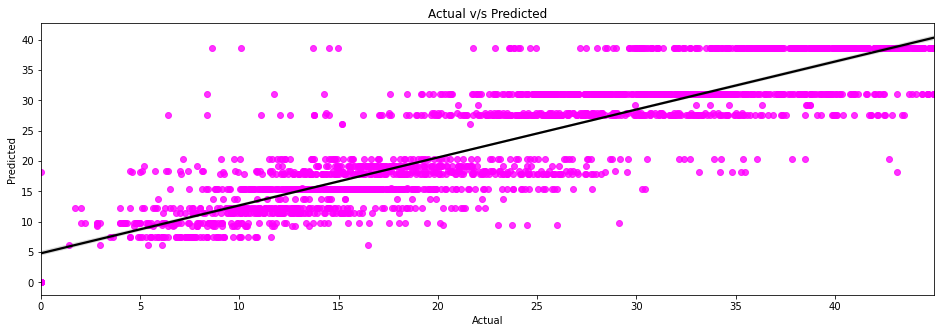

In [144]:
from sklearn.tree import DecisionTreeRegressor
# ML Model - 2 Implementation
# Defining the model
D_tree=DecisionTreeRegressor(max_depth=5)
# Fit the Algorithm

D_tree.fit(X_train,Y_train)
# Predict on the model

y_predict_train=D_tree.predict(X_train)
y_predict_test=D_tree.predict(X_test)
# Adding the scores to resultDF

result_dict={
    'Model':'DecisionTreeRegressor',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df
plot_scatter(y_predict_test,Y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [145]:
# Defining Model
tree=DecisionTreeRegressor()
# Creating the Parameters Dict
parameters={
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }
# Fit the Algorithm
DT_tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)

DT_tuning_model.fit(X_train,Y_train)

DT_tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=9, max_features='auto')

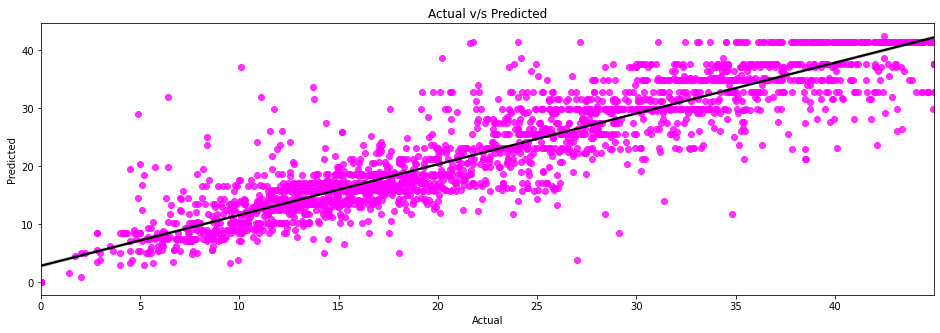

In [146]:
# ML Model - 2 Implementation
# Predicting the model
y_predict_train=DT_tuning_model.predict(X_train)
y_predict_test=DT_tuning_model.predict(X_test)
# Adding the scores to resultDF

result_dict={
    'Model':'DTree_GridSearchCV',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df
plot_scatter(y_predict_test,Y_test)

In [147]:
result_Df


Model  Test_MAE   Test_MSE  Test_RMSE  \
0               RandomForestRegressor  2.400510  13.388648   3.659050   
1  RandomForestRegressor_GridSearchCV  2.796694  16.559196   4.069299   
2               DecisionTreeRegressor  3.996534  29.245843   5.407943   
3                  DTree_GridSearchCV  3.107357  20.162920   4.490314   

   Test_r2_score  Train_MAE  Train_MSE  Train_RMSE  Train_r2_score  
0       0.889032   0.885217   1.817957    1.348316        0.986171  
1       0.857871   2.333904  10.965952    3.311488        0.909798  
2       0.729040   3.863391  27.805808    5.273121        0.752288  
3       0.834630   2.496921  13.193101    3.632231        0.896005

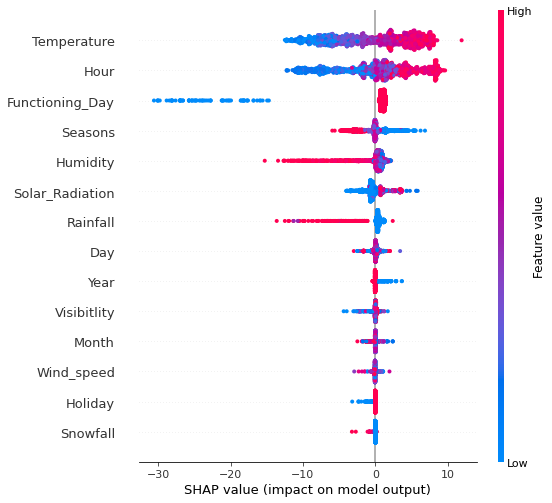

In [148]:



explainer = shap.TreeExplainer(DT_tuning_model.best_estimator_, X_train,check_additivity=False)

# Generate SHAP values for your test data
shap_values = explainer.shap_values(X_test,check_additivity=False)
shap.summary_plot(shap_values, X_test,feature_names=X.columns)

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV.GridSearchCV is often preferred because it exhaustively searches through all possible hyperparameter combinations, guaranteeing that the optimal values will be found within the specified range

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen the improvements in DecisionTreeClassifier after hyperparameter tuning before Tuning r2_socre for train is 0.75 and test is 0.72, after tuning the r2_score for train is 0.89 and test is 0.83. And we can see that in Actual V/s predicted graph . Before tuning the more plots are not near the regression line and for tunned model the plots are near to regression line 

### ML Model - 3

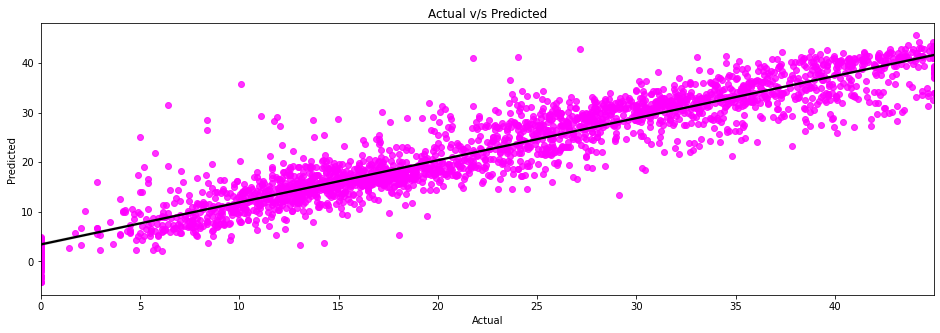

In [149]:
# ML Model - 3 Implementation

# Define the model
gradboo_reg=GradientBoostingRegressor()

# Fit the Algorithm
gradboo_reg.fit(X_train,Y_train)

# Predict on the model
y_predict_train=gradboo_reg.predict(X_train)
y_predict_test=gradboo_reg.predict(X_test)



plot_scatter(y_predict_test,Y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [150]:
result_dict={
    'Model':'GBRegressor',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df

Model  Test_MAE   Test_MSE  Test_RMSE  \
0               RandomForestRegressor  2.400510  13.388648   3.659050   
1  RandomForestRegressor_GridSearchCV  2.796694  16.559196   4.069299   
2               DecisionTreeRegressor  3.996534  29.245843   5.407943   
3                  DTree_GridSearchCV  3.107357  20.162920   4.490314   
4                         GBRegressor  2.917428  16.946398   4.116600   

   Test_r2_score  Train_MAE  Train_MSE  Train_RMSE  Train_r2_score  
0       0.889032   0.885217   1.817957    1.348316        0.986171  
1       0.857871   2.333904  10.965952    3.311488        0.909798  
2       0.729040   3.863391  27.805808    5.273121        0.752288  
3       0.834630   2.496921  13.193101    3.632231        0.896005  
4       0.848145   2.781754  14.740360    3.839318        0.871432

#### 2. Cross- Validation & Hyperparameter Tuning

In [151]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gbr=GradientBoostingRegressor()
     

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

# Fit the Algorithm
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearchcv on xtrain and ytrain
grad_boo_tuning.fit(X_train,Y_train)
grad_boo_tuning.best_params_




{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.5}

In [152]:
# Predict the models
y_predict_train=grad_boo_tuning.predict(X_train)
y_predict_test=grad_boo_tuning.predict(X_test)
# ADD row to result_DF
result_dict={
    'Model':'GBRegressor_GridSearchCV',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df


Model  Test_MAE   Test_MSE  Test_RMSE  \
0               RandomForestRegressor  2.400510  13.388648   3.659050   
1  RandomForestRegressor_GridSearchCV  2.796694  16.559196   4.069299   
2               DecisionTreeRegressor  3.996534  29.245843   5.407943   
3                  DTree_GridSearchCV  3.107357  20.162920   4.490314   
4                         GBRegressor  2.917428  16.946398   4.116600   
5            GBRegressor_GridSearchCV  2.231011  11.695066   3.419805   

   Test_r2_score  Train_MAE  Train_MSE  Train_RMSE  Train_r2_score  
0       0.889032   0.885217   1.817957    1.348316        0.986171  
1       0.857871   2.333904  10.965952    3.311488        0.909798  
2       0.729040   3.863391  27.805808    5.273121        0.752288  
3       0.834630   2.496921  13.193101    3.632231        0.896005  
4       0.848145   2.781754  14.740360    3.839318        0.871432  
5       0.904252   0.957950   1.674108    1.293873        0.987368

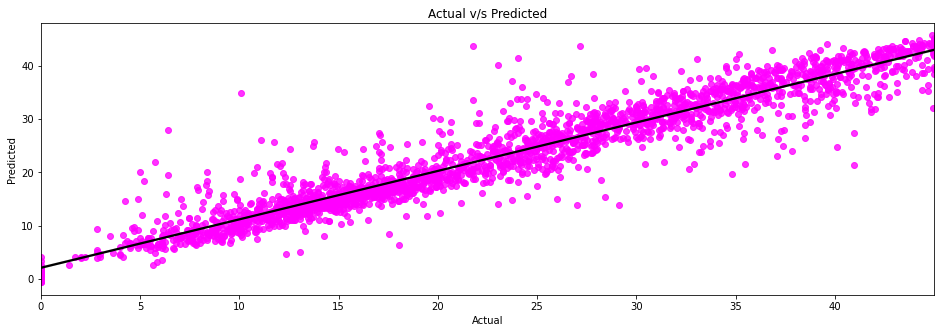

In [153]:
plot_scatter(y_predict_test,Y_test)

100%|===================| 2364/2365 [01:02<00:00]        

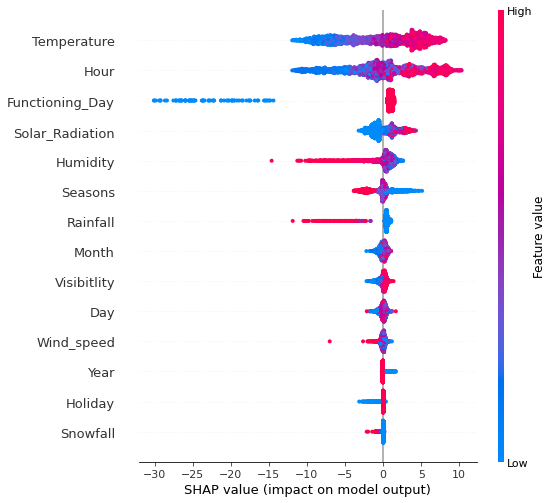

In [154]:
explainer = shap.Explainer(grad_boo_tuning.best_estimator_, X_train,check_additivity=False)

# Generate SHAP values for your test data
shap_values = explainer.shap_values(X_test,check_additivity=False)
shap.summary_plot(shap_values, X_test,feature_names=X.columns)

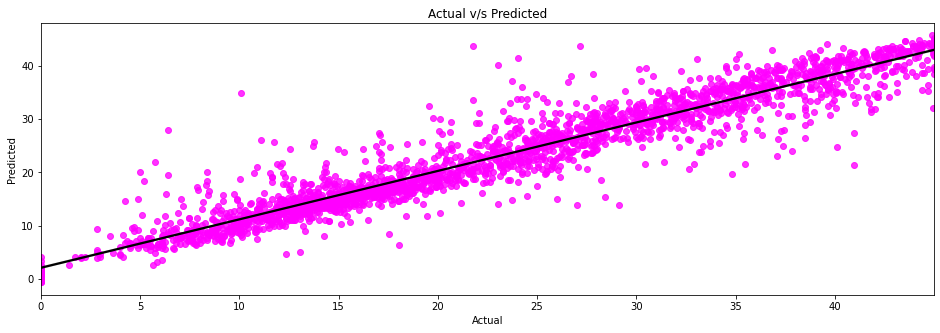

In [155]:
plot_scatter(y_predict_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV.GridSearchCV is often preferred because it exhaustively searches through all possible hyperparameter combinations, guaranteeing that the optimal values will be found within the specified range

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

GradientBoostingRegressor has less difference between test r2_score and train r2_score and after tuning the parameters we got the best model with Test r2_score of 0.90 and train r2_score of 0.98.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We used R2_score as the evaluation metric's because it provides a measure of how well the model fits the data and how much of the variation in the dependent variable is explained by the model. This is important for busi.nesses because they want to know how much of their target variable can be explained by the model, which in turn helps them make better decisions

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We are choosing the GradientBoostRegression model as our final Predict model because it has best r2_score for train (0.98) and test (0.98) and RMSE for train(1.29) and test (1.28). 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

GradientBoostingRegressor is a supervised learning algorithm used for regression tasks that involves the prediction of a continuous numerical target variable. It works by building an ensemble of weak decision trees in a greedy and sequential manner. Each decision tree is built to correct the errors of the previous tree, by focusing on the samples with high residual errors.

The algorithm starts by initializing the target variable as the mean of the training data. It then builds a decision tree to predict the residuals, i.e., the difference between the actual target values and the predicted target values. The residual tree is added to the previous prediction to get an updated prediction. This process is repeated until a specified number of trees are built or the residuals become small enough.

**Temperature and Hour are the most important features for the Models**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [157]:
# Save the File
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(grad_boo_tuning, files)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [158]:
# Load the File and predict unseen data.
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
# check prediction
lr.score(X_val,Y_val)

0.9174718698801348

In [159]:

result_Df


Model  Test_MAE   Test_MSE  Test_RMSE  \
0               RandomForestRegressor  2.400510  13.388648   3.659050   
1  RandomForestRegressor_GridSearchCV  2.796694  16.559196   4.069299   
2               DecisionTreeRegressor  3.996534  29.245843   5.407943   
3                  DTree_GridSearchCV  3.107357  20.162920   4.490314   
4                         GBRegressor  2.917428  16.946398   4.116600   
5            GBRegressor_GridSearchCV  2.231011  11.695066   3.419805   

   Test_r2_score  Train_MAE  Train_MSE  Train_RMSE  Train_r2_score  
0       0.889032   0.885217   1.817957    1.348316        0.986171  
1       0.857871   2.333904  10.965952    3.311488        0.909798  
2       0.729040   3.863391  27.805808    5.273121        0.752288  
3       0.834630   2.496921  13.193101    3.632231        0.896005  
4       0.848145   2.781754  14.740360    3.839318        0.871432  
5       0.904252   0.957950   1.674108    1.293873        0.987368

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**EDA insights:**

1. Bikes are leased out most frequently in the summer and least frequently in the winter.
2. On days that are regarded as non-holidays, more than 96% of the motorcycles are leased.

3. In the area with temperatures of 15 to 30 degrees, the majority of bicycles are leased.
4. Most number of bikes are rented when there is no snowfall or rainfall.
5. Majority of the bikes are rented for a humidity percentage range of 30 to 70.
6. The 18th hour, or 6 o'clock, saw the most cycle bookings; the 4th hour, or 4 o'clock, saw the least.
7. Most of the bike rentals have been made when there is high visibility.

**Results from ML models:**
1. GradientBoost Regression with GridSearchCV is the best performing model with Test r2_score of 0.90. And It gave same r2_score for Unseen data

2. Temperature and Hour are the two most important factors according to all the models.


**Challenges faced:**
1. Removing Outliers.

2. Encoding the categorical columns.
3. Choosing Model explainability technique.

**The RandomForestRegresor has the Train and test r2_score of 0. and 0.91 but the Train RMSE and Test RMSE are 3.3 & 3.2 respectively.The DecisionTreeRegressor has the Train and test r2_score of 0.89and 0.89 but the Train RMSE and Test RMSE are 3.6 & 3.6 respectively.The GradientBoostingRegressor has the Train and test r2_score of 0.98and 0.98 but the Train RMSE and Test RMSE are 1.2& 1.2 respectively. The Best model is GradientBoostingRegressor it gave the R2_Score on the Unseen Data X_val as well.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***